# Pathrise Project

Pathrise's company as a recruitment agency holds a program which helps job seekers find a job. Actually this project is a combination of a classic classification problem and regression. According to data of people getting involved in Pathrise's program in the past, the project has two main Objectives.
1. predict whether people would be able to find a job or not.
2. how long does it take to find a job? The main steps of this project are:

In [196]:
import datetime 
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_curve,roc_auc_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.svm import SVC,SVR
from sklearn.linear_model import LinearRegression
import pickle
from warnings import simplefilter
simplefilter(action='ignore', category=[FutureWarning])
%matplotlib inline

In [197]:
file_path='G:/Data Road map course/presentation/results/'

In [198]:
df=pd.read_excel('Data_Pathrise.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2544 non-null   int64  
 1   pathrise_status              2544 non-null   object 
 2   primary_track                2544 non-null   object 
 3   cohort_tag                   2536 non-null   object 
 4   program_duration_days        1928 non-null   float64
 5   placed                       2544 non-null   int64  
 6   employment_status            2315 non-null   object 
 7   highest_level_of_education   2486 non-null   object 
 8   length_of_job_search         2470 non-null   object 
 9   biggest_challenge_in_search  2520 non-null   object 
 10  professional_experience      2322 non-null   object 
 11  work_authorization_status    2260 non-null   object 
 12  number_of_interviews         2326 non-null   float64
 13  number_of_applicat

In [199]:
for cols in df.columns:
    print('distinct values of The column {} are {}:'.format(cols,len(df[cols].unique())),'\nthe values are\n\n',df[cols].unique(),'\n')

distinct values of The column id are 2544: 
the values are

 [   1    2    3 ... 2542 2543 2544] 

distinct values of The column pathrise_status are 9: 
the values are

 ['Active' 'Closed Lost' 'Placed' 'Withdrawn (Failed)' 'Withdrawn (Trial)'
 'Withdrawn' 'Deferred' 'Break' 'MIA'] 

distinct values of The column primary_track are 6: 
the values are

 ['SWE' 'PSO' 'Design' 'Data' 'Web' 'Marketing'] 

distinct values of The column cohort_tag are 48: 
the values are

 ['OCT19A' 'JAN20A' 'AUG19B' 'AUG19A' 'SEP19A' 'AUG19C' 'DEC19A' 'FEB20A'
 'NOV19A' 'NOV19B' 'JAN20B' 'FEB20B' 'JUL19B' 'APR20A' 'OCT18A' 'SEP18C'
 'OCT18B' 'JAN19A' 'MAR19A' 'FEB19A' 'FEB19B' 'APR19A' 'AUG18A' 'DEC18A'
 'MAR19B' 'JAN19B' 'JUN19B' 'SEP18B' 'NOV18A' 'SEP18A' 'APR19B' 'MAY19A'
 'JUL19A' 'JUN19A' 'FEB18A' 'JUN18A' 'MAR18A' 'APR18A' 'APR18B' 'MAY18A'
 'OCT21A' 'SEP19B' 'MAR20A' 'MAY19B' 'FEB20a' 'OCT19B' 'JAN18A' nan] 

distinct values of The column program_duration_days are 412: 
the values are

 [ nan   0.  89

In [200]:
for cols in df.columns:
    if df[cols].count()<len(df.index):
       print("The column {}has {} missing values\n".format(cols,df[cols].isnull().sum()))

The column cohort_taghas 8 missing values

The column program_duration_dayshas 616 missing values

The column employment_statushas 229 missing values

The column highest_level_of_educationhas 58 missing values

The column length_of_job_searchhas 74 missing values

The column biggest_challenge_in_searchhas 24 missing values

The column professional_experiencehas 222 missing values

The column work_authorization_statushas 284 missing values

The column number_of_interviewshas 218 missing values

The column genderhas 492 missing values

The column racehas 18 missing values



In [201]:
cols_name=[]
for col in df.columns:
    cols_name.append(col.strip())
df.columns=cols_name

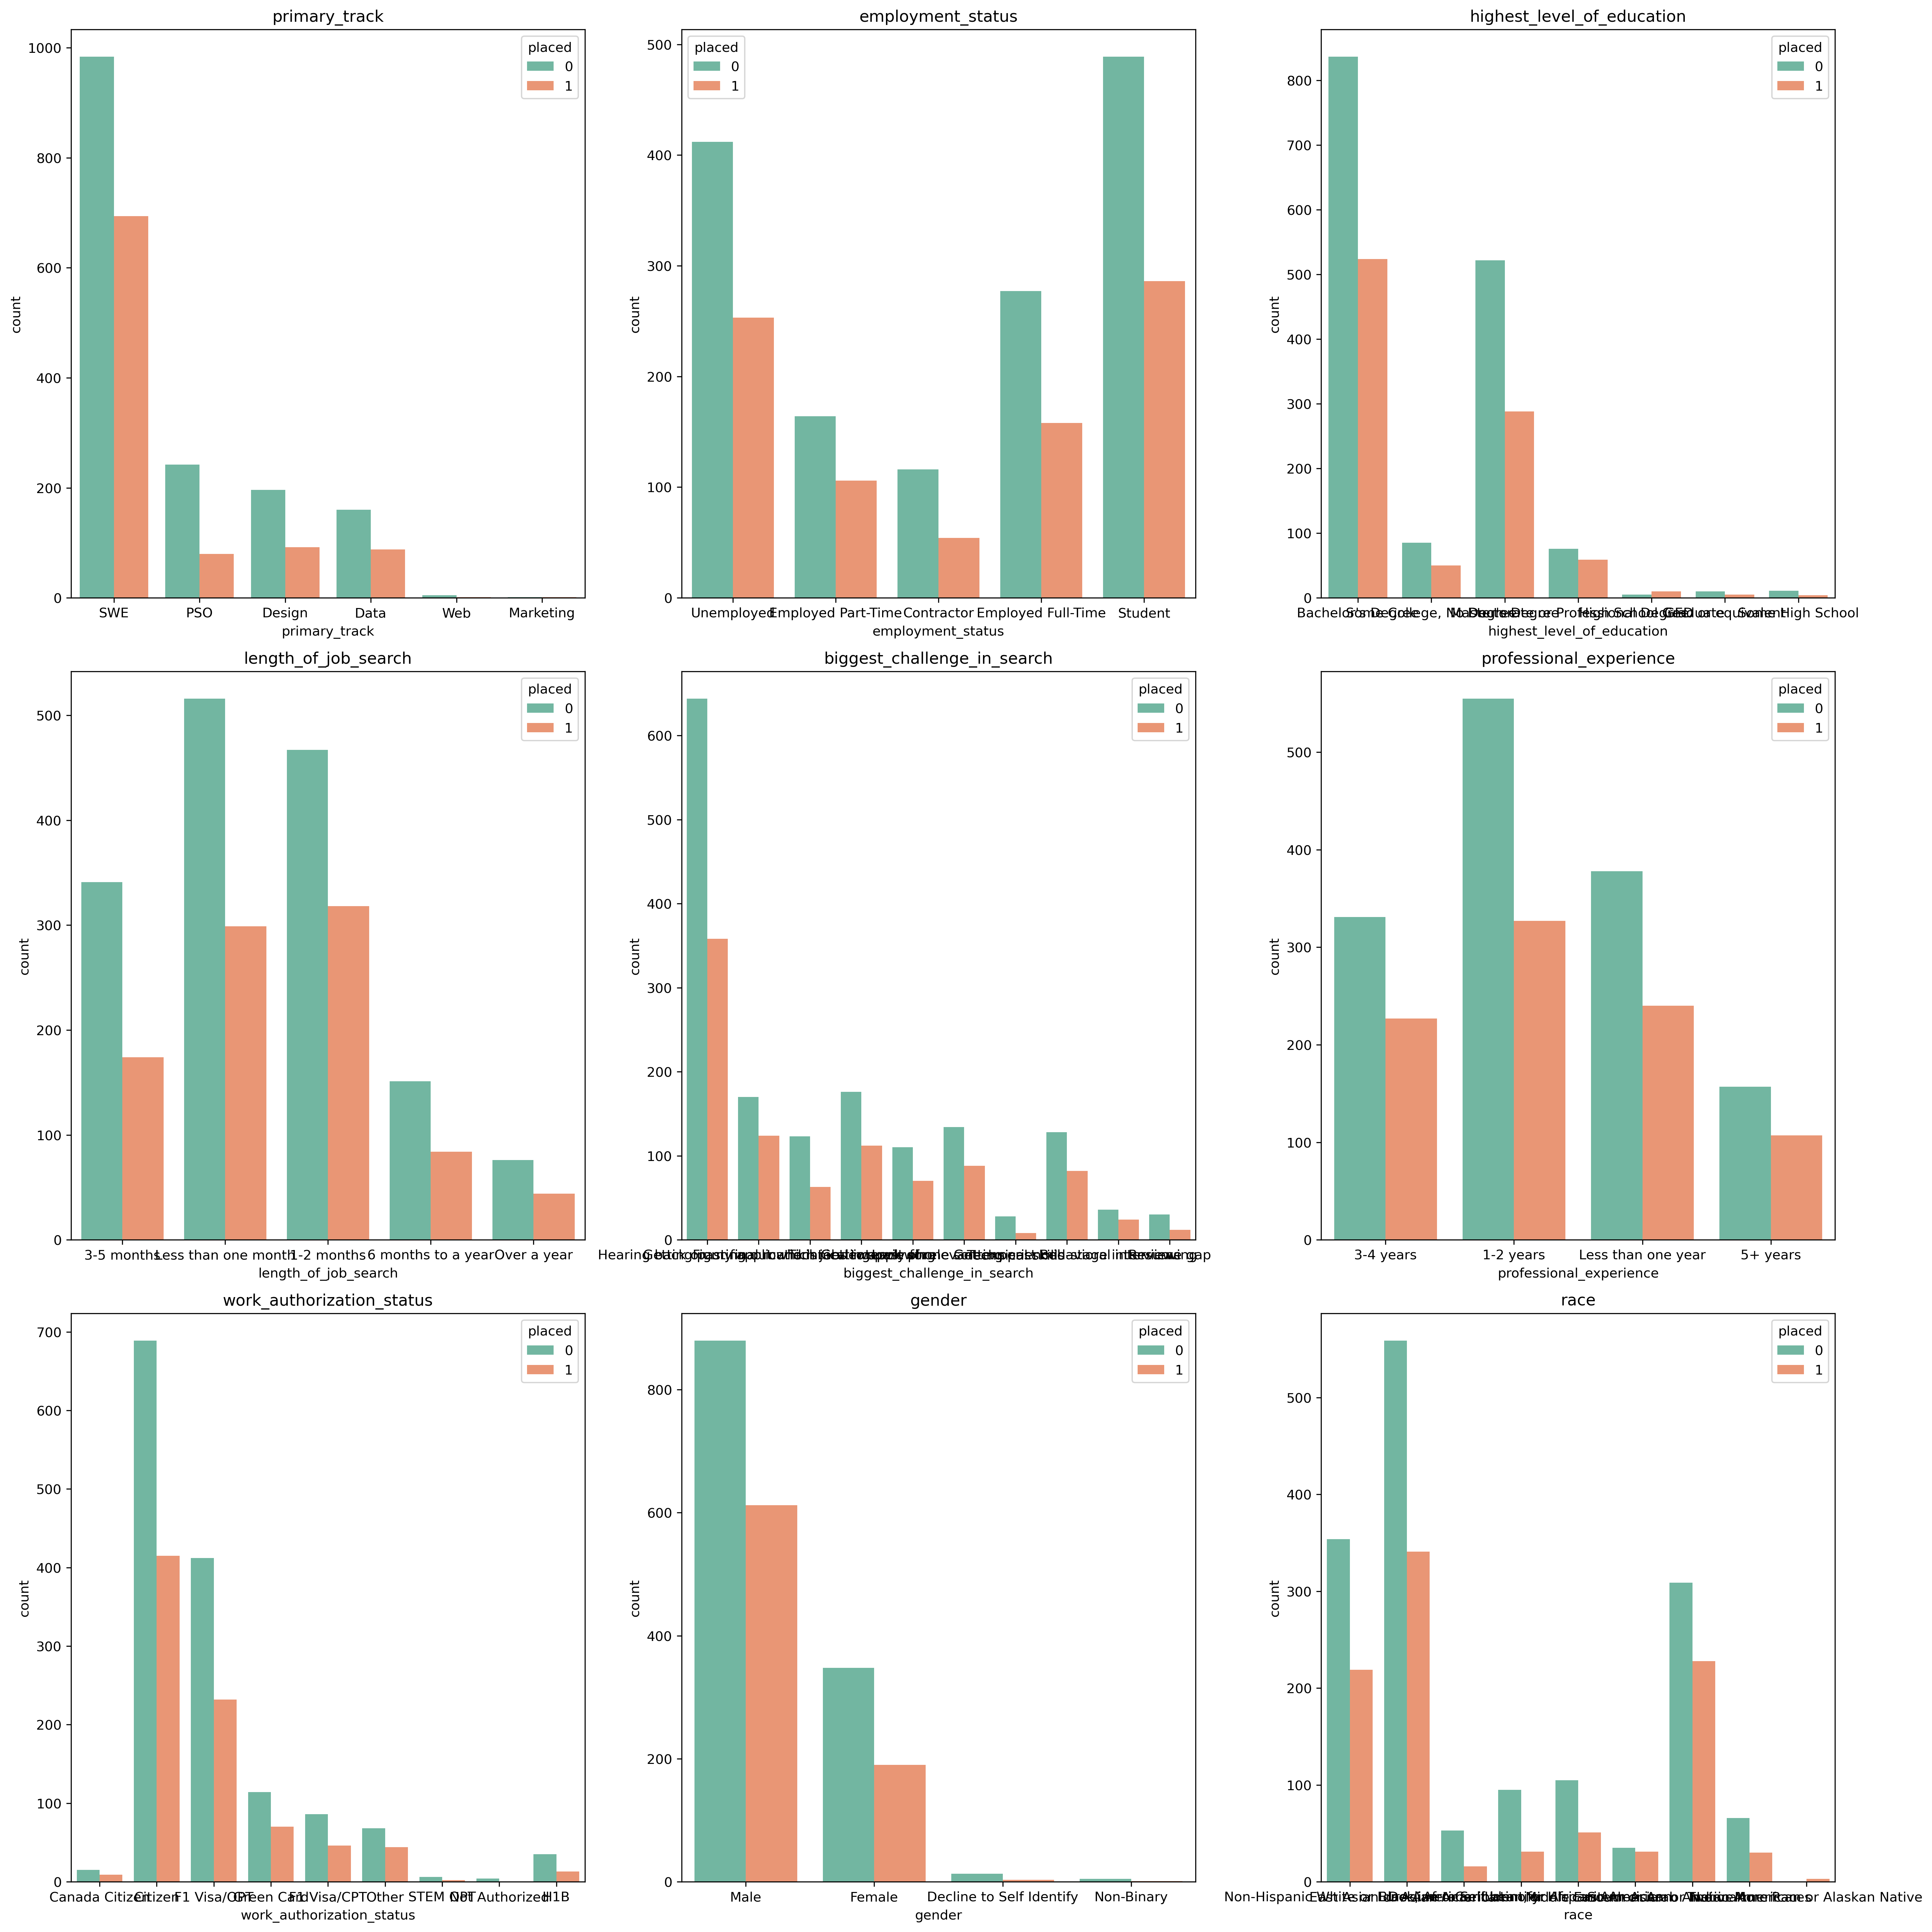

In [202]:
cols_name=['primary_track', 'employment_status',
       'highest_level_of_education', 'length_of_job_search',
       'biggest_challenge_in_search', 'professional_experience',
       'work_authorization_status', 'gender', 'race']

plt.figure(figsize=(20,20),dpi=300,layout='constrained')
for i,j in enumerate(cols_name):
    plt.subplot(3,3,i+1)
    sn.countplot(data=df,x=j,hue='placed',palette='Set2')
    plt.title(j)
    

In [203]:
for i,j in enumerate(cols_name):
    plt.figure(figsize=(10,10),dpi=300)
    sn.countplot(data=df,x=j,hue='placed',palette='Set2')
    plt.title(j)
    plt.xticks(rotation=45)
    fname=file_path+'{}_count.png'.format(j)
    plt.savefig(fname=fname,dpi=300,bbox_inches='tight',transparent=True)
    plt.close()

In [204]:
cols_name=['primary_track', 'employment_status',
       'highest_level_of_education', 'length_of_job_search',
       'biggest_challenge_in_search', 'professional_experience',
       'work_authorization_status', 'gender','race']
rows=3
cols=3
fig, ax=plt.subplots(nrows=rows,ncols=cols,figsize=(30,30),dpi=300)
for i,j in enumerate(cols_name):
    row=i%rows
    col=i//rows
    df_pie=df[[j,'placed']]
    df_pie=df_pie[df['placed']==1]
    labels=df_pie[j].value_counts().index
    data=df_pie[j].value_counts().values
    max_value=max(df_pie[j].value_counts().values)
    explode=[0.1*int(i/max_value) for i in data]
    ax[row,col].set_title('placed/{}'.format(j))
    ax[row,col].pie(data,labels=labels,autopct='%.0f%%',explode=explode)
    inner_circle=plt.Circle((0,0),0.4,color='white')
    ax[row,col].add_artist(inner_circle)

In [205]:
font={'size':20}
for i,j in enumerate(cols_name):
    fig,ax=plt.subplots(figsize=(10,10),dpi=300)
    df_pie=df[[j,'placed']]
    df_pie=df_pie[df['placed']==1]
    labels=df_pie[j].value_counts().index
    data=df_pie[j].value_counts().values
    max_value=max(df_pie[j].value_counts().values)
    explode=[0.1*int(i/max_value) for i in data]
    plt.rc('font',**font)
    plt.pie(data,labels=labels,autopct='%.0f%%',explode=explode)
    inner_circle=plt.Circle((0,0),0.4,color='white')
    ax.add_artist(inner_circle)
    plt.title('placed/{}'.format(j))
    fname=file_path+'{}_pi.png'.format(j)
    plt.savefig(fname=fname,dpi=300,bbox_inches='tight',transparent=True)
    plt.close()
plt.rcdefaults()

In [206]:
def radial_plot(s):
    
    df_radil=s.value_counts()
    df_radil=pd.DataFrame(df_radil)
    df_radil.reset_index(inplace=True)
    df_radil.columns=[s.name,'COUNT']
    df_radil=df_radil.sort_values(by=['COUNT'])
    
    max_value_full_ring = df_radil['COUNT'].sum()
    
    start_color = '#2f4b7c'
    end_color = '#ffa600'
    num_steps = len(df_radil)
       
    start_r, start_g, start_b = int(start_color[1:3], 16), int(start_color[3:5], 16), int(start_color[5:7], 16)
    end_r, end_g, end_b = int(end_color[1:3], 16), int(end_color[3:5], 16), int(end_color[5:7], 16)
    
    ring_colours = [start_color]  
    
    for i in range(1, num_steps - 1):  
        r = start_r + (i * (end_r - start_r)) // (num_steps - 1)
        g = start_g + (i * (end_g - start_g)) // (num_steps - 1)
        b = start_b + (i * (end_b - start_b)) // (num_steps - 1)
        
        ring_colours.append(f'#{r:02x}{g:02x}{b:02x}')
    
    ring_colours.append(end_color)  
    

    ring_labels = [f'   {x} ({v}) ' for x, v in zip(list(df_radil[s.name]), 
                                                 list(df_radil['COUNT']))]
    data_len = len(df_radil)
   
    
    fig = plt.figure(figsize=(10,10), linewidth=10,)
                 
    rect = [0.1,0.1,0.8,0.8]
   
    ax_polar_bg = fig.add_axes(rect, polar=True, frameon=False)
    ax_polar_bg.set_theta_zero_location('N')
    ax_polar_bg.set_theta_direction(1)
    
    for i in range(data_len):
        ax_polar_bg.barh(i, 1.5*np.pi, 
                     color='grey', 
                     alpha=0.1)
       
        ax_polar_bg.axis('off')
    
    
    ax_polar = fig.add_axes(rect, polar=True, frameon=False)
    ax_polar.set_theta_zero_location('N')
    ax_polar.set_theta_direction(1)
    ax_polar.set_rgrids([i for i in range(len(df_radil[s.name].unique()))], 
                    labels=ring_labels, 
                    angle=0, 
                    fontsize=14, fontweight='bold',
                    color='black', verticalalignment='center')
    
    for i in range(data_len):
        ax_polar.barh(i, list(df_radil['COUNT'])[i]*1.5*np.pi/max_value_full_ring, 
                  color=ring_colours[i])
        ax_polar.grid(False)
        ax_polar.tick_params(axis='both', left=False, bottom=False, 
                   labelbottom=False, labelleft=True)

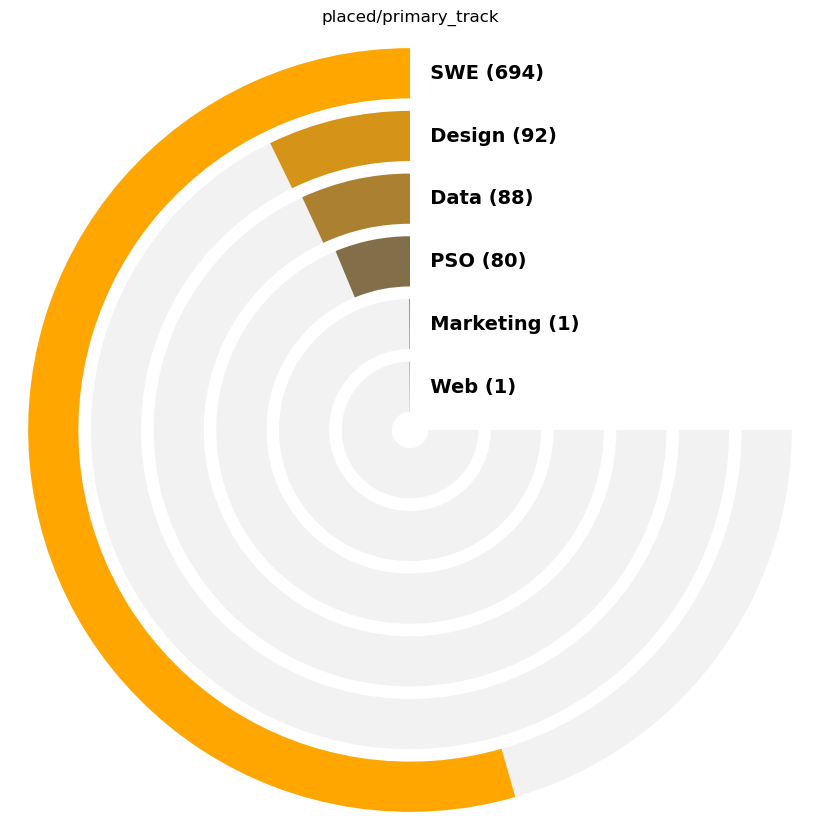

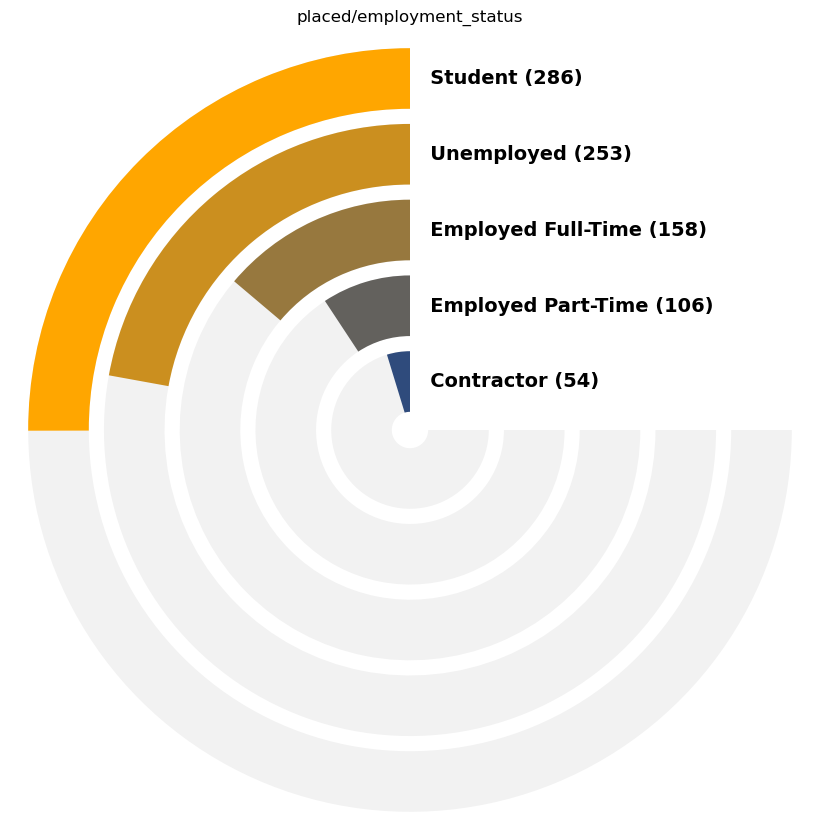

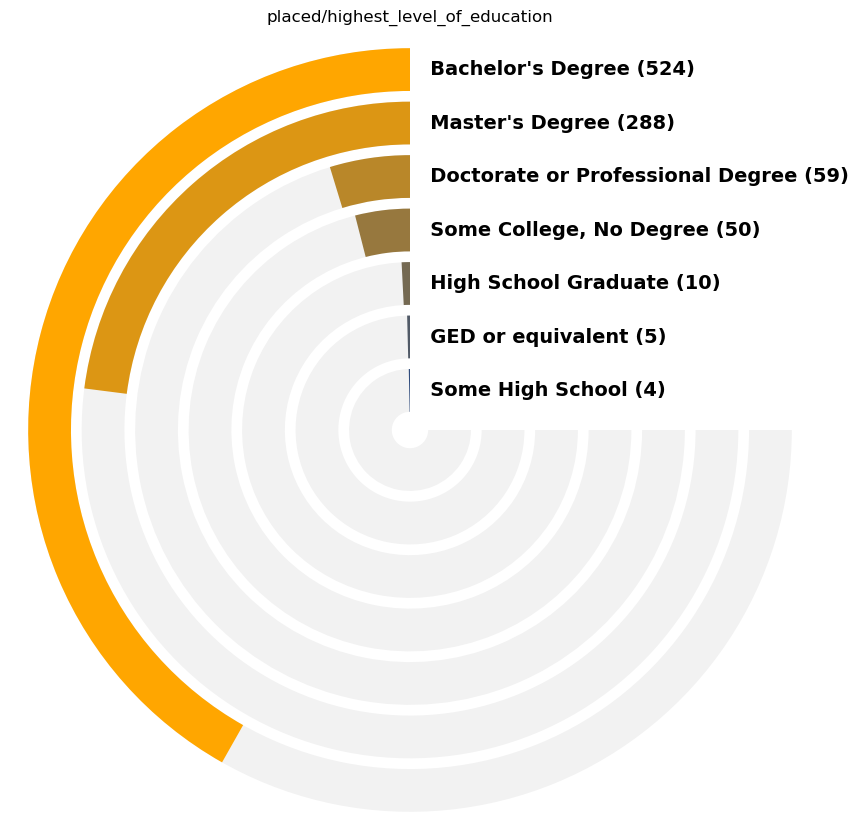

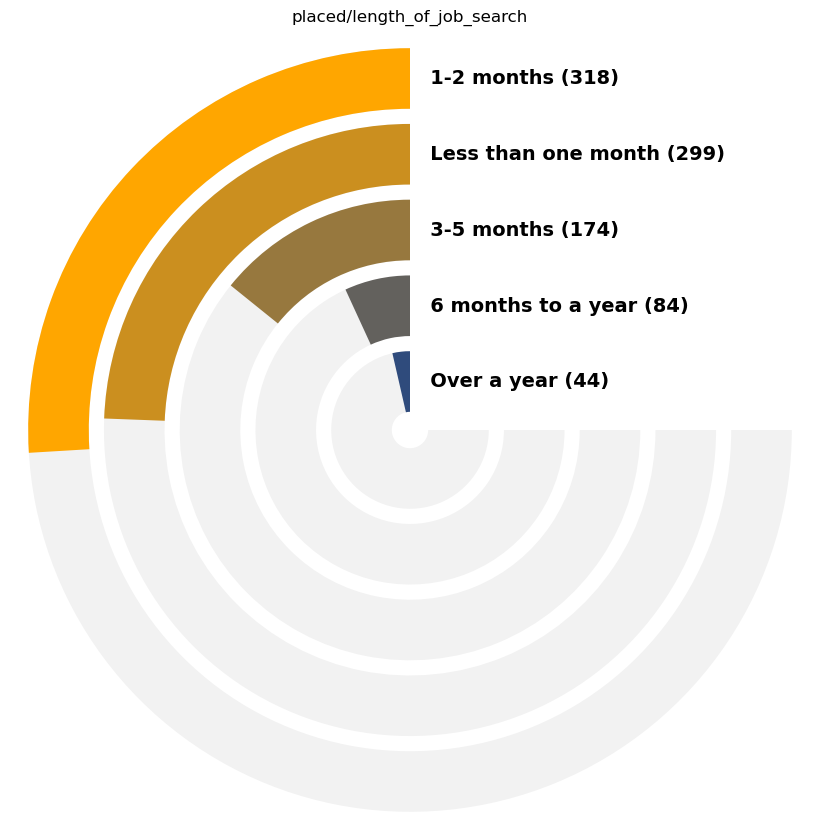

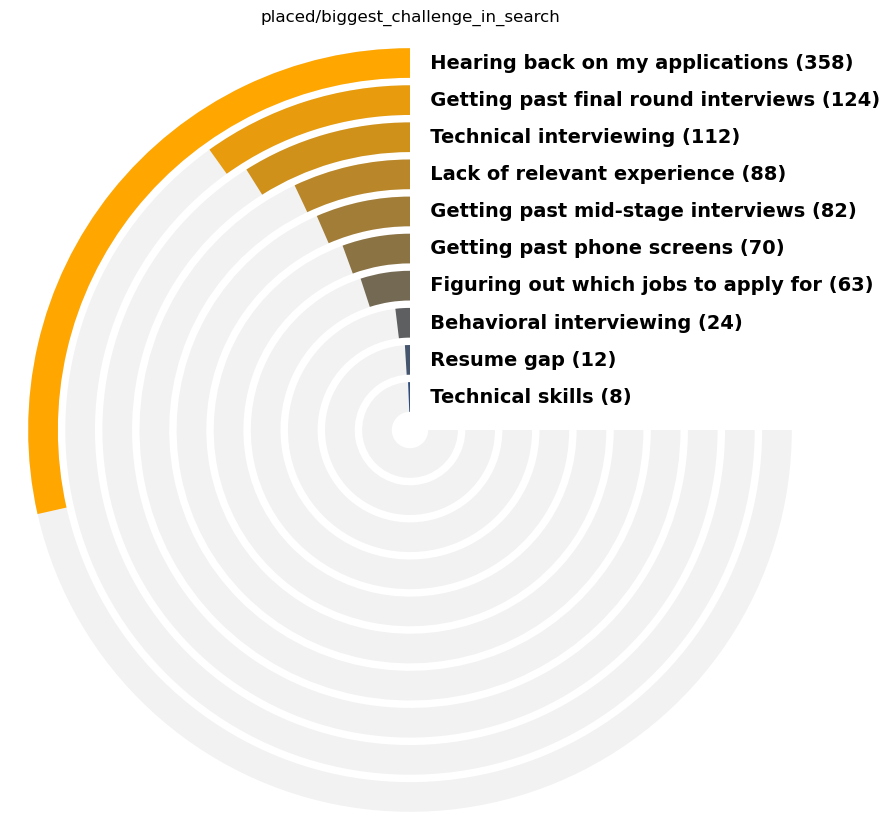

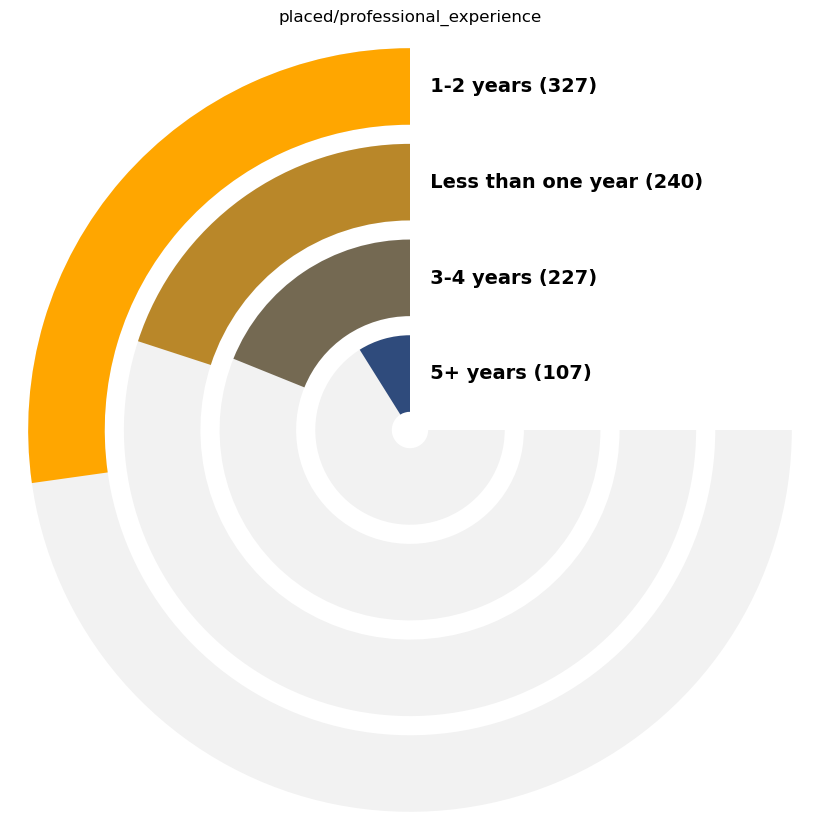

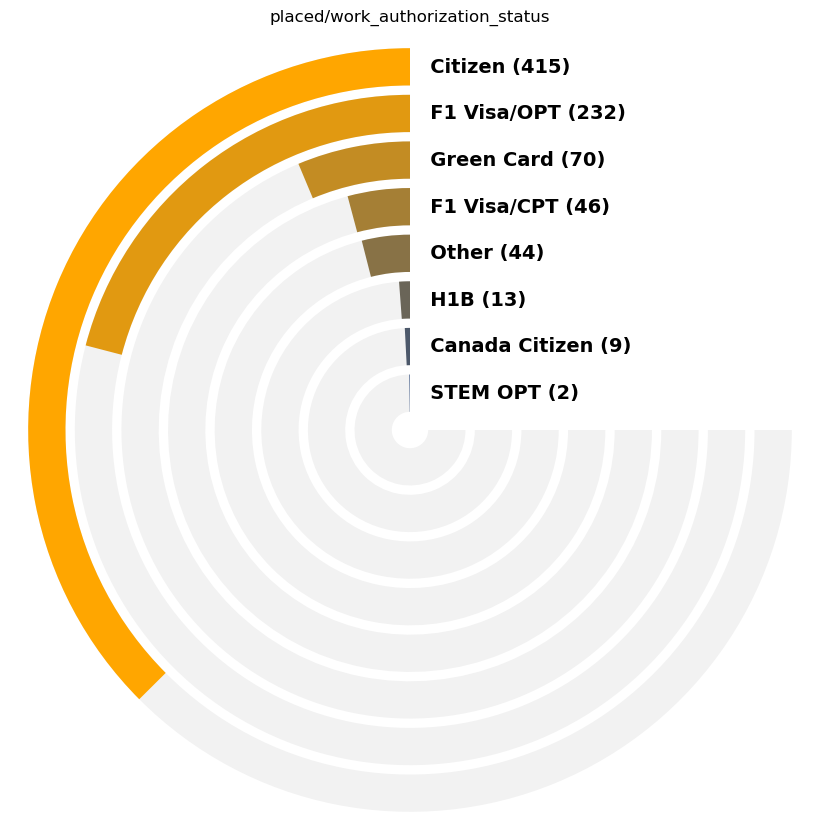

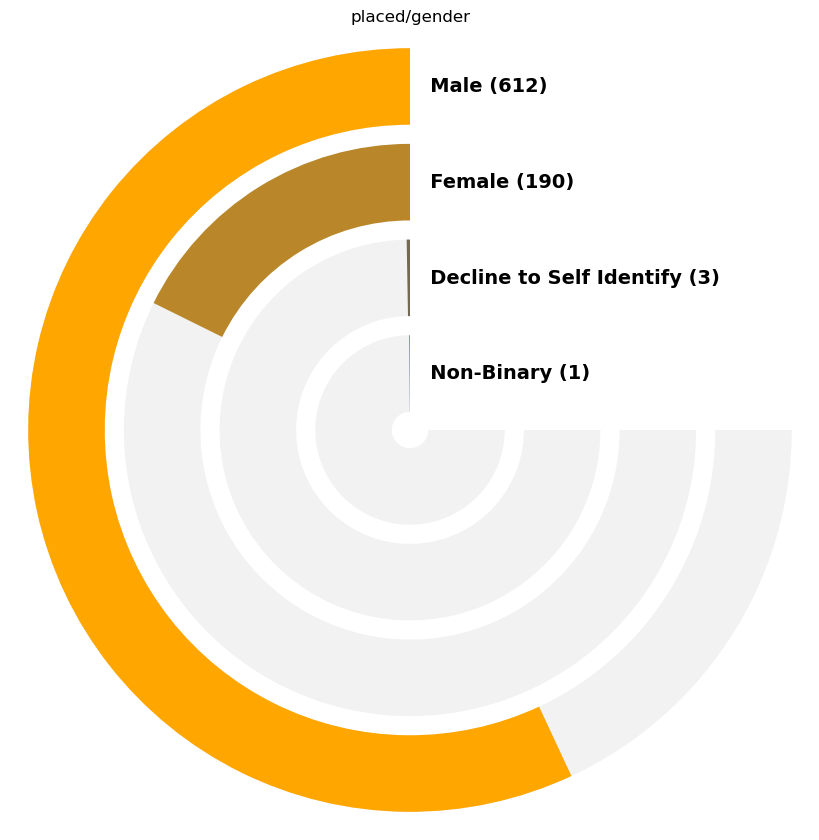

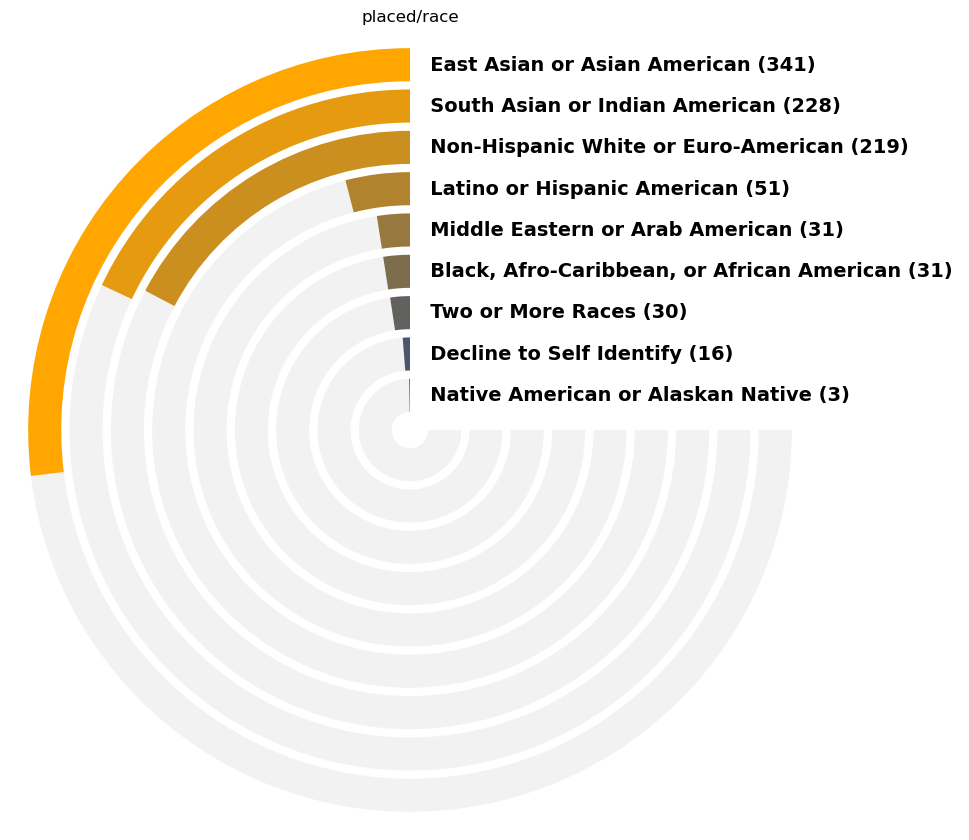

In [207]:
cols_name=['primary_track', 'employment_status',
       'highest_level_of_education', 'length_of_job_search',
       'biggest_challenge_in_search', 'professional_experience',
       'work_authorization_status', 'gender','race']

for i,j in enumerate(cols_name):
    df_temp=df[[j,'placed']]
    df_temp=df_temp[df['placed']==1]
    radial_plot(df_temp[j])
    plt.title('placed/{}'.format(j))
    fname=file_path+'{}_radial.png'.format(j)
    plt.savefig(fname=fname,dpi=300,bbox_inches='tight',transparent=True)

In [208]:
cols=['primary_track', 'employment_status',
       'highest_level_of_education', 'length_of_job_search',
       'biggest_challenge_in_search', 'professional_experience',
       'work_authorization_status', 'gender', 'race']
dic_pivot={}
for col in cols:
    pivot_table1=pd.pivot_table(df[[col,'placed']],index='placed', columns=col, aggfunc='size')
    column_total=pivot_table1.sum()
    pivot_table2=pivot_table1.divide(column_total)*100
    pivot_table2.index=['Not placed %','Placed %']
    row_total=column_total.sum()
    population=column_total.divide(row_total)*100
    pivot_table2.loc['population %']=population
    dic_pivot[col]=pivot_table2
    ptivot_heat=pivot_table2.style.background_gradient(cmap ='viridis').format("{:.2f}")
    display(ptivot_heat)
    ptivot_heat.to_excel(file_path+'{}_pivot.xlsx'.format(col))

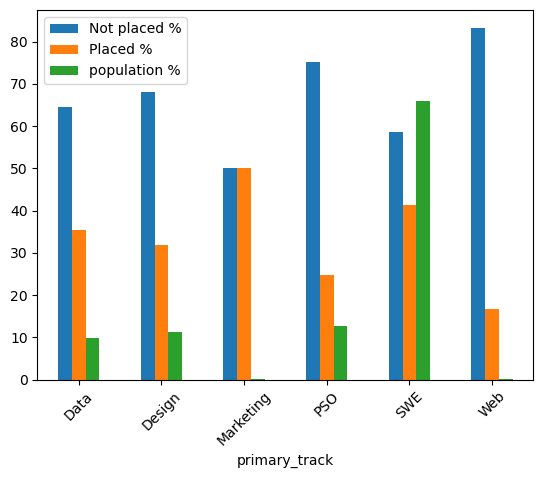

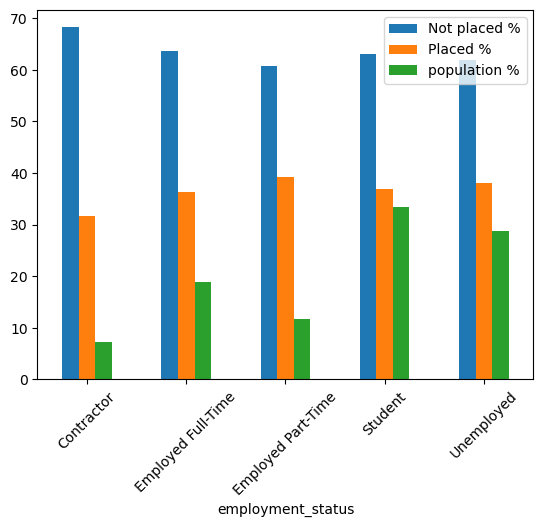

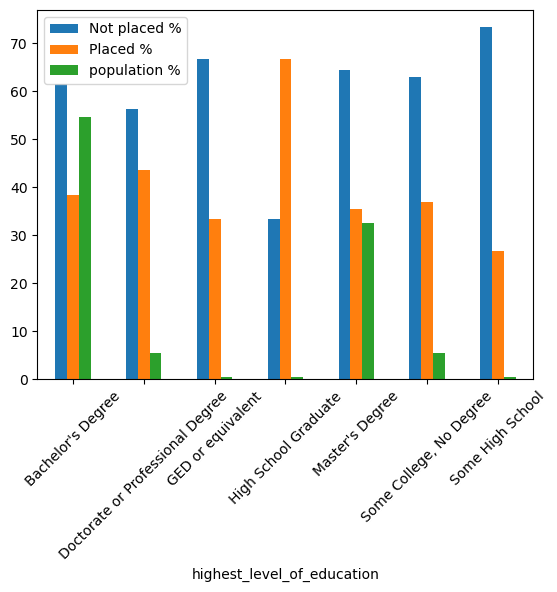

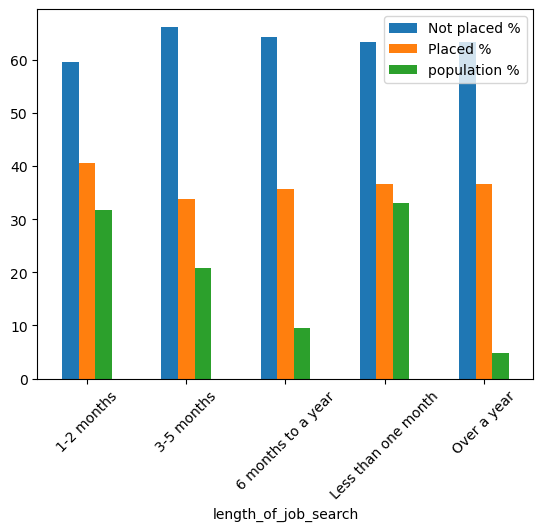

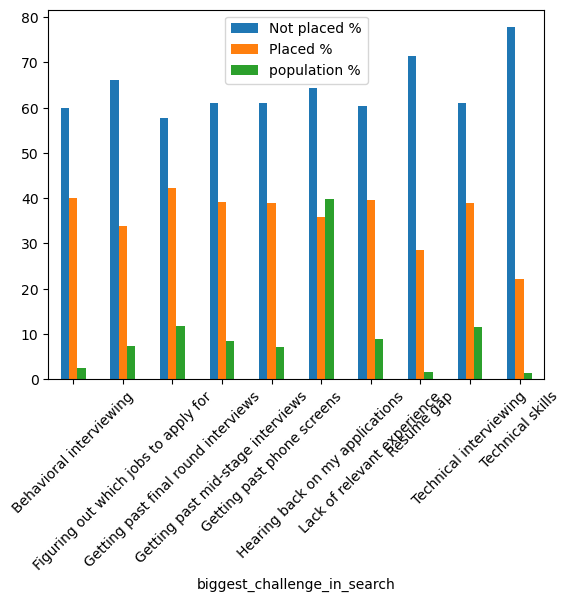

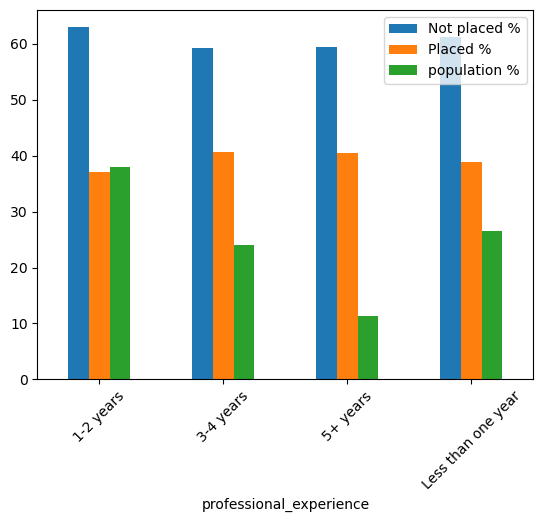

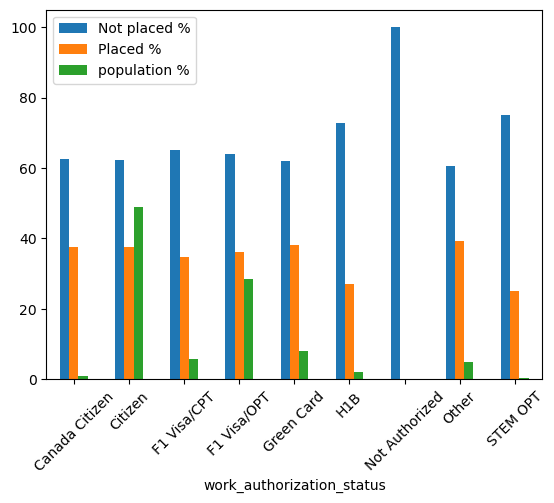

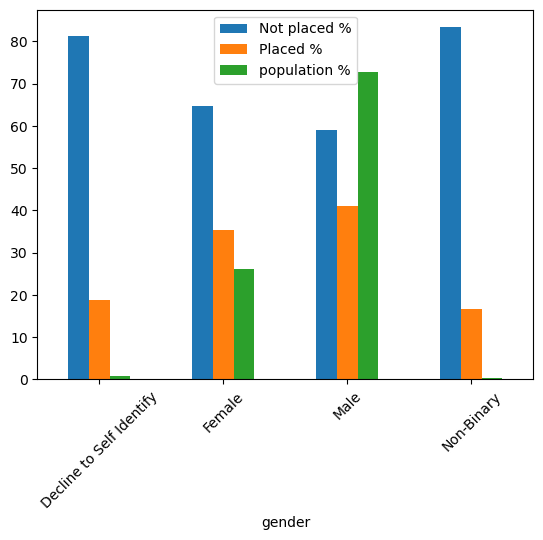

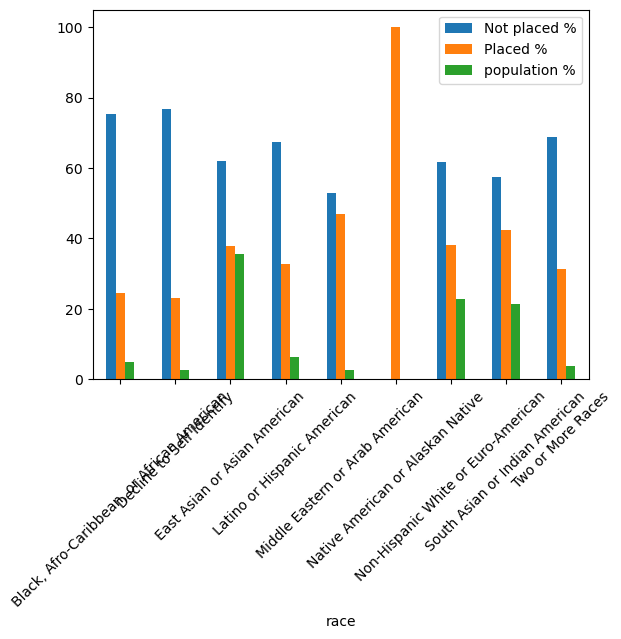

In [209]:
for i,j in enumerate(dic_pivot):
    data=np.round(dic_pivot[j].transpose(),2)
    data.plot.bar()
    plt.xticks(rotation=45)
    fname=file_path+'{}_pivot_bar.png'.format(j)
    plt.savefig(fname=fname,dpi=300,bbox_inches='tight',transparent=True)
  

In [210]:
df.select_dtypes(include='number').columns

Index(['id', 'program_duration_days', 'placed', 'number_of_interviews',
       'number_of_applications'],
      dtype='object')

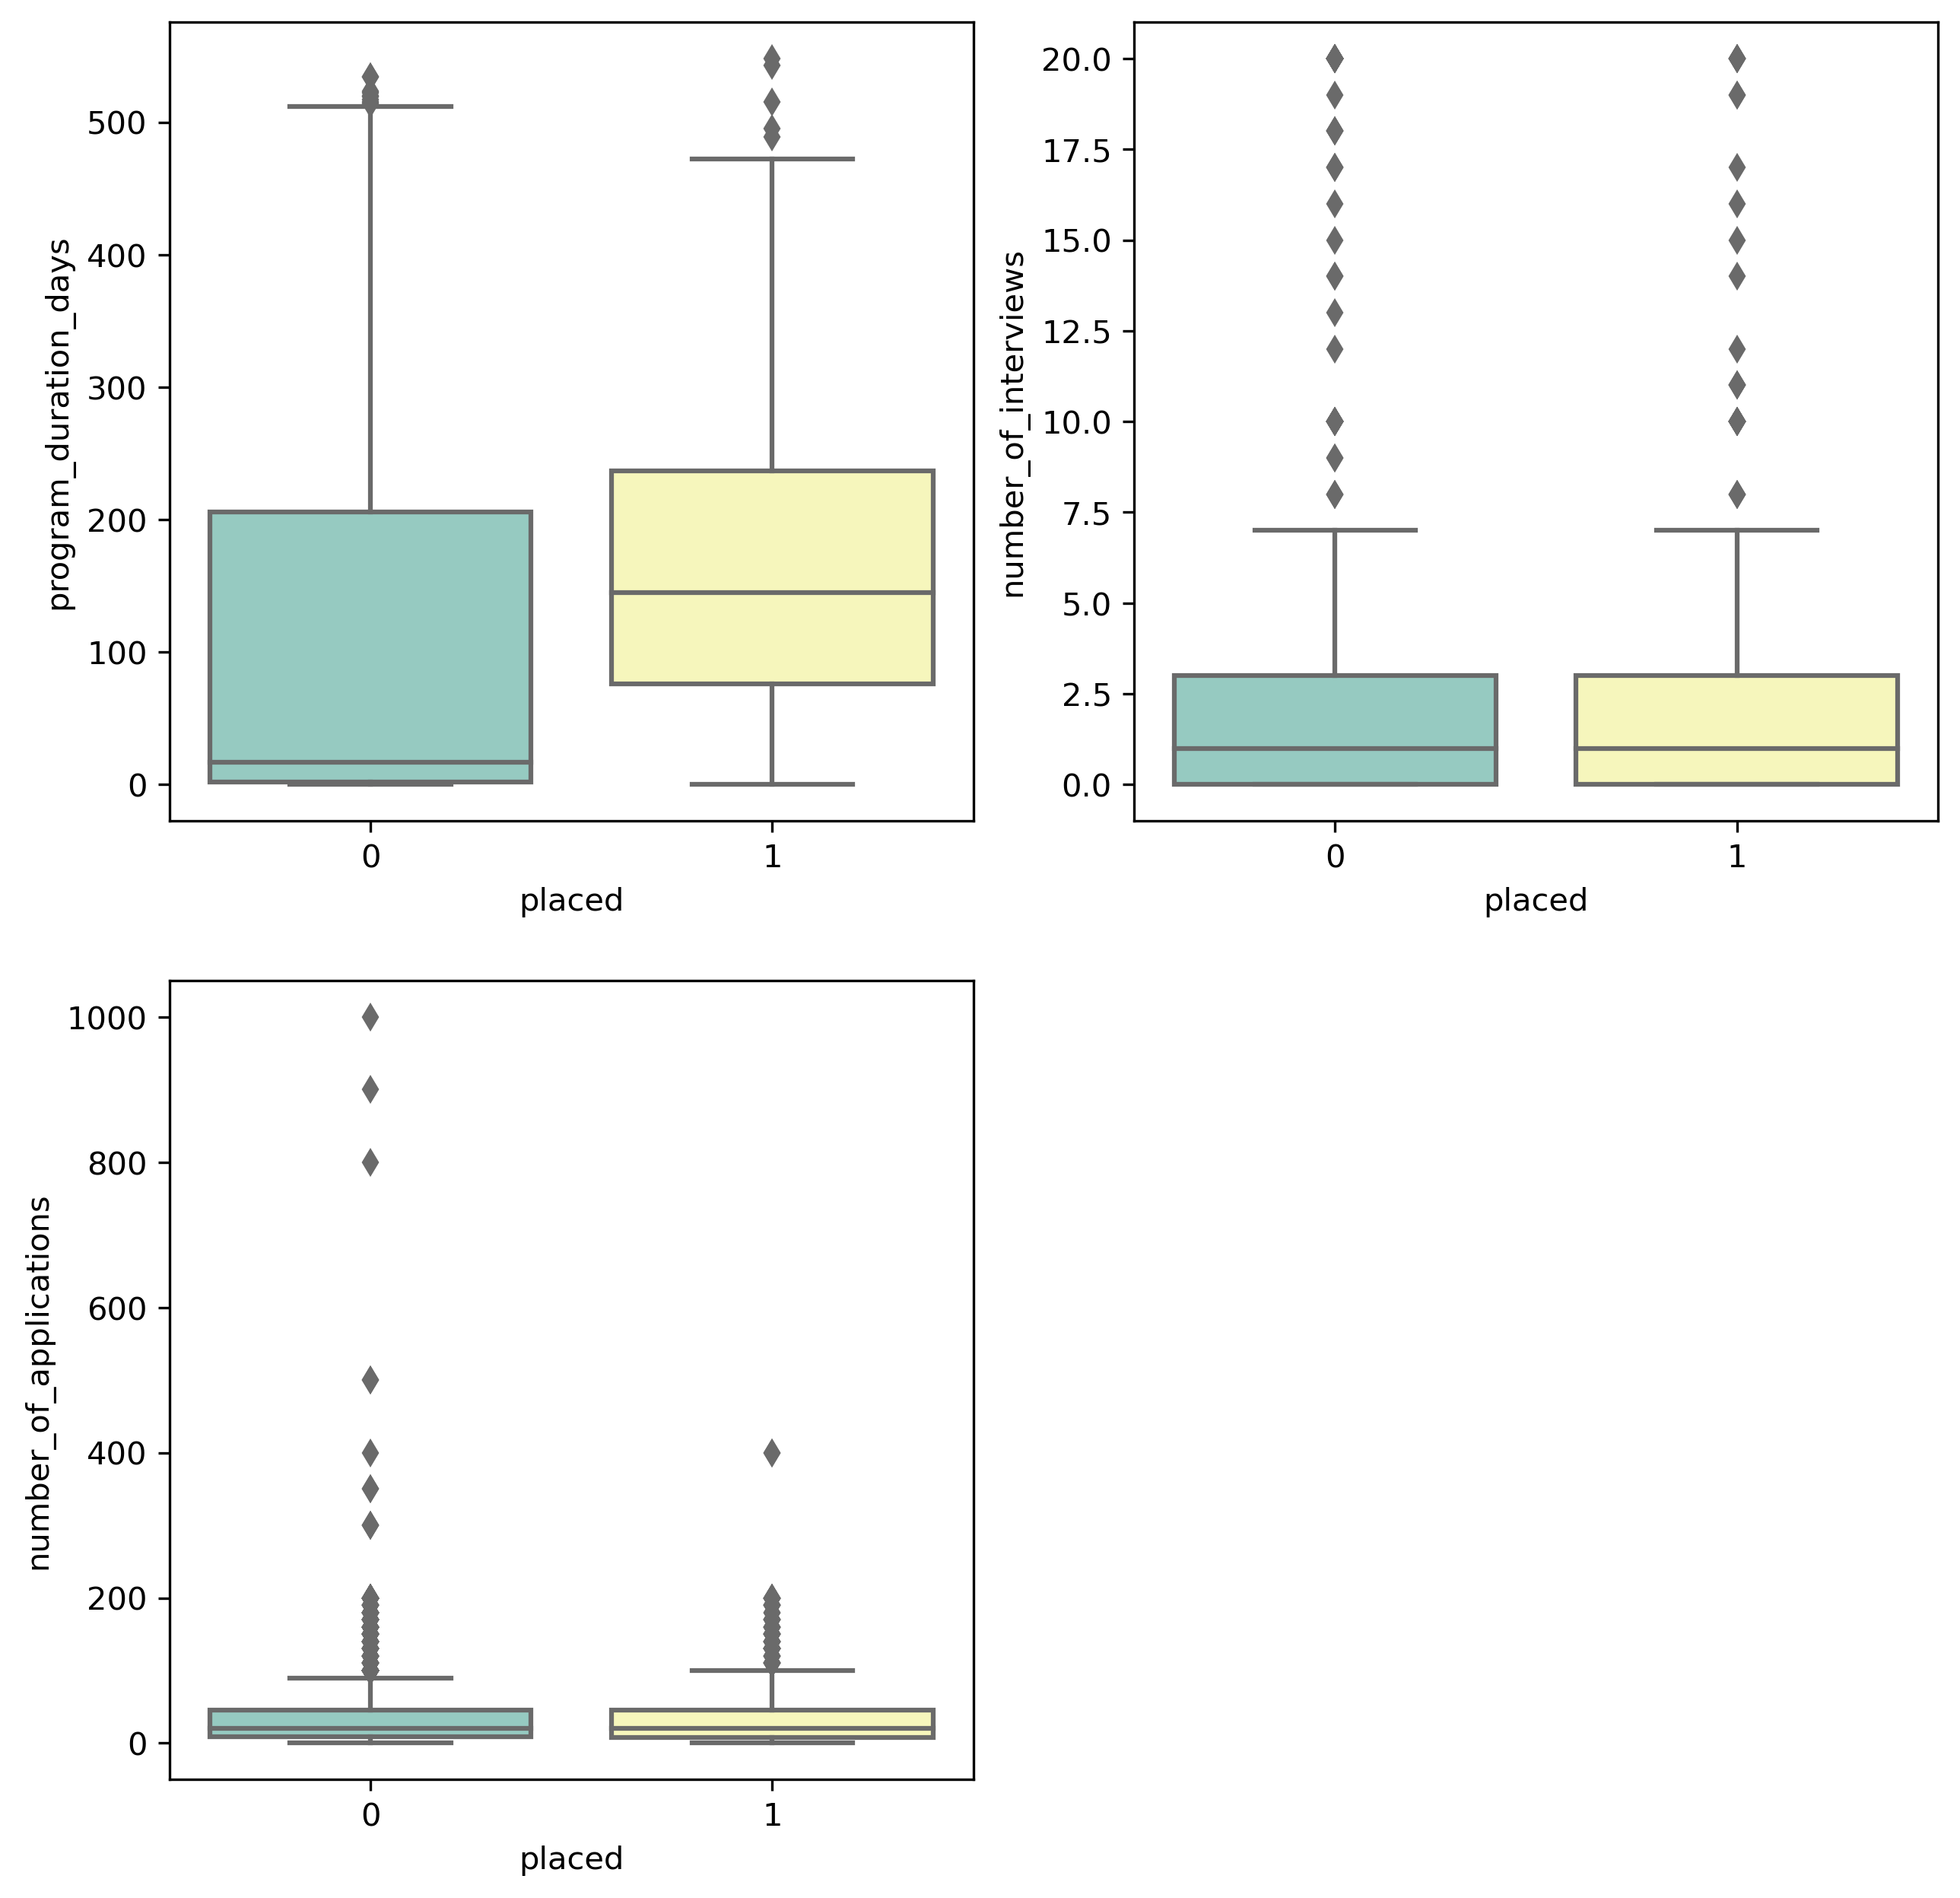

In [211]:
cols_name=['program_duration_days','number_of_interviews','number_of_applications']
plt.figure(figsize=(10,10),dpi=300)
for j,col in enumerate(cols_name):
    plt.subplot(2,2,j+1)
    sn.boxplot(data=df,y=col,x='placed',palette='Set3')



In [212]:
font={'size':20}
for i,j in enumerate(cols_name):
    plt.figure(figsize=(10,10),dpi=300)
    plt.rc('font',**font)
    sn.boxplot(data=df,y=j,x='placed',palette='Set3')
    fname=file_path+'{}_boxplot.png'.format(j)
    plt.savefig(fname=fname,dpi=300,bbox_inches='tight',transparent=True)
    plt.close()
plt.rcdefaults()

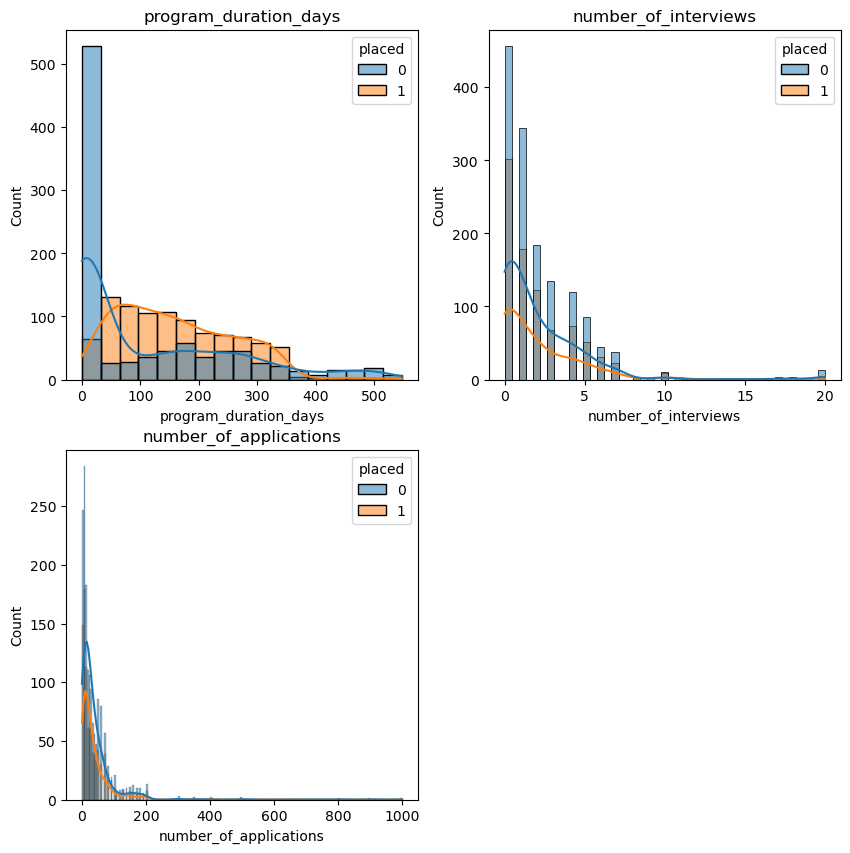

In [213]:
cols_name=['program_duration_days','number_of_interviews','number_of_applications']
plt.figure(figsize=(10,10),dpi=100)
for i,j in enumerate(cols_name):
    plt.subplot(2,2,i+1)
    sn.histplot(data=df,x=j,hue='placed',kde=True)
    plt.title(j)


In [214]:
for i,j in enumerate(cols_name):
    plt.figure(figsize=(10,10),dpi=300)
    sn.histplot(data=df,x=j,hue='placed',kde=True)
    fname=file_path+'{}_histplot.png'.format(j)
    plt.savefig(fname=fname,dpi=300,bbox_inches='tight',transparent=True)
    plt.close()

In [215]:
df.describe()

id  program_duration_days       placed  number_of_interviews  \
count  2544.000000            1928.000000  2544.000000           2326.000000   
mean   1272.500000             136.098548     0.375786              2.182287   
std     734.533866             125.860248     0.484420              2.959273   
min       1.000000               0.000000     0.000000              0.000000   
25%     636.750000              14.000000     0.000000              0.000000   
50%    1272.500000             112.000000     0.000000              1.000000   
75%    1908.250000             224.000000     1.000000              3.000000   
max    2544.000000             548.000000     1.000000             20.000000   

       number_of_applications  
count             2544.000000  
mean                36.500786  
std                 53.654896  
min                  0.000000  
25%                  9.000000  
50%                 20.000000  
75%                 45.000000  
max               1000.000000

In [216]:
cols_name=['program_duration_days','number_of_interviews','number_of_applications']

for col in cols_name:
    df_IQR=df[col]
    mean=df[col].mean()
    q1=df_IQR.quantile(0.25)
    q3=df_IQR.quantile(0.75)
    IQR=q3-q1
    upper=df_IQR[df_IQR<=(q3+1.5*IQR)].max()
    lower=df_IQR[df_IQR>=(q1-1.5*IQR)].min()
    df[col]=np.where(df[col]>upper,mean,np.where(df[col]<lower,mean,df[col]))

df.describe()


id  program_duration_days       placed  number_of_interviews  \
count  2544.000000            1928.000000  2544.000000           2326.000000   
mean   1272.500000             135.673857     0.375786              1.818899   
std     734.533866             125.166513     0.484420              1.901221   
min       1.000000               0.000000     0.000000              0.000000   
25%     636.750000              14.000000     0.000000              0.000000   
50%    1272.500000             112.000000     0.000000              1.000000   
75%    1908.250000             224.000000     1.000000              3.000000   
max    2544.000000             534.000000     1.000000              7.000000   

       number_of_applications  
count             2544.000000  
mean                26.271876  
std                 21.436808  
min                  0.000000  
25%                  9.000000  
50%                 20.000000  
75%                 36.500786  
max                 90.000000

In [217]:
df1=df.copy()

In [218]:
def get_monday_date(text):
    text=str(text).upper()
    month_name=text[:3]
    year=int('20'+text[3:5])
    char=text[-1:]
    if text!='NAN':
        # Convert month abbreviation to numeric value
        month_num = datetime.datetime.strptime(month_name, '%b').month
        
        # Find the first day of the given month and year
        first_day = datetime.date(year, month_num, 1)
        
        # Find the day of the week of the first day (0 = Monday, 1 = Tuesday, etc.)
        first_day_weekday = first_day.weekday()
        # Calculate the number of days until the first Monday of the month
        
        days_until_first_monday = (7 - first_day_weekday) % 7
        # Calculate the date of the first Monday
        first_monday_date = first_day + datetime.timedelta(days_until_first_monday)
        # Calculate the date of the third Monday
        third_monday_date = first_monday_date + datetime.timedelta(weeks=2)
        
        forth_monday_date=first_monday_date + datetime.timedelta(weeks=3)
        # Return the appropriate date depending on the character passed
        if char == 'A':
            return first_monday_date
        elif char == 'B':
            return third_monday_date
        elif char == 'C':
            return forth_monday_date
        else:
            return None  # Invalid character passed
    return None
        

In [219]:
df1['start_date']=df1['cohort_tag'].apply(lambda x:get_monday_date(x))
df1.dropna(subset='start_date',axis=0,inplace=True)
date_max=df1['start_date'].max()+datetime.timedelta(days=1)
df1.loc[:,'duration']=df1['start_date'].apply(lambda x:(datetime.date(date_max.year,date_max.month,date_max.day)-datetime.date(x.year,x.month,x.day)).days)

In [220]:
df1.loc[df1['pathrise_status']=='Break','program_duration_days']=0
df1.loc[df1['pathrise_status']=='MIA','program_duration_days']=0
df1['program_duration_days'].fillna(df1['duration'],inplace=True)
miss_col=['employment_status','highest_level_of_education','work_authorization_status']
for col in miss_col:
    df1[col].fillna(df1[col].value_counts().idxmax(),inplace=True)
    df1[col].replace('',df1[col].value_counts().idxmax(),inplace=True)   

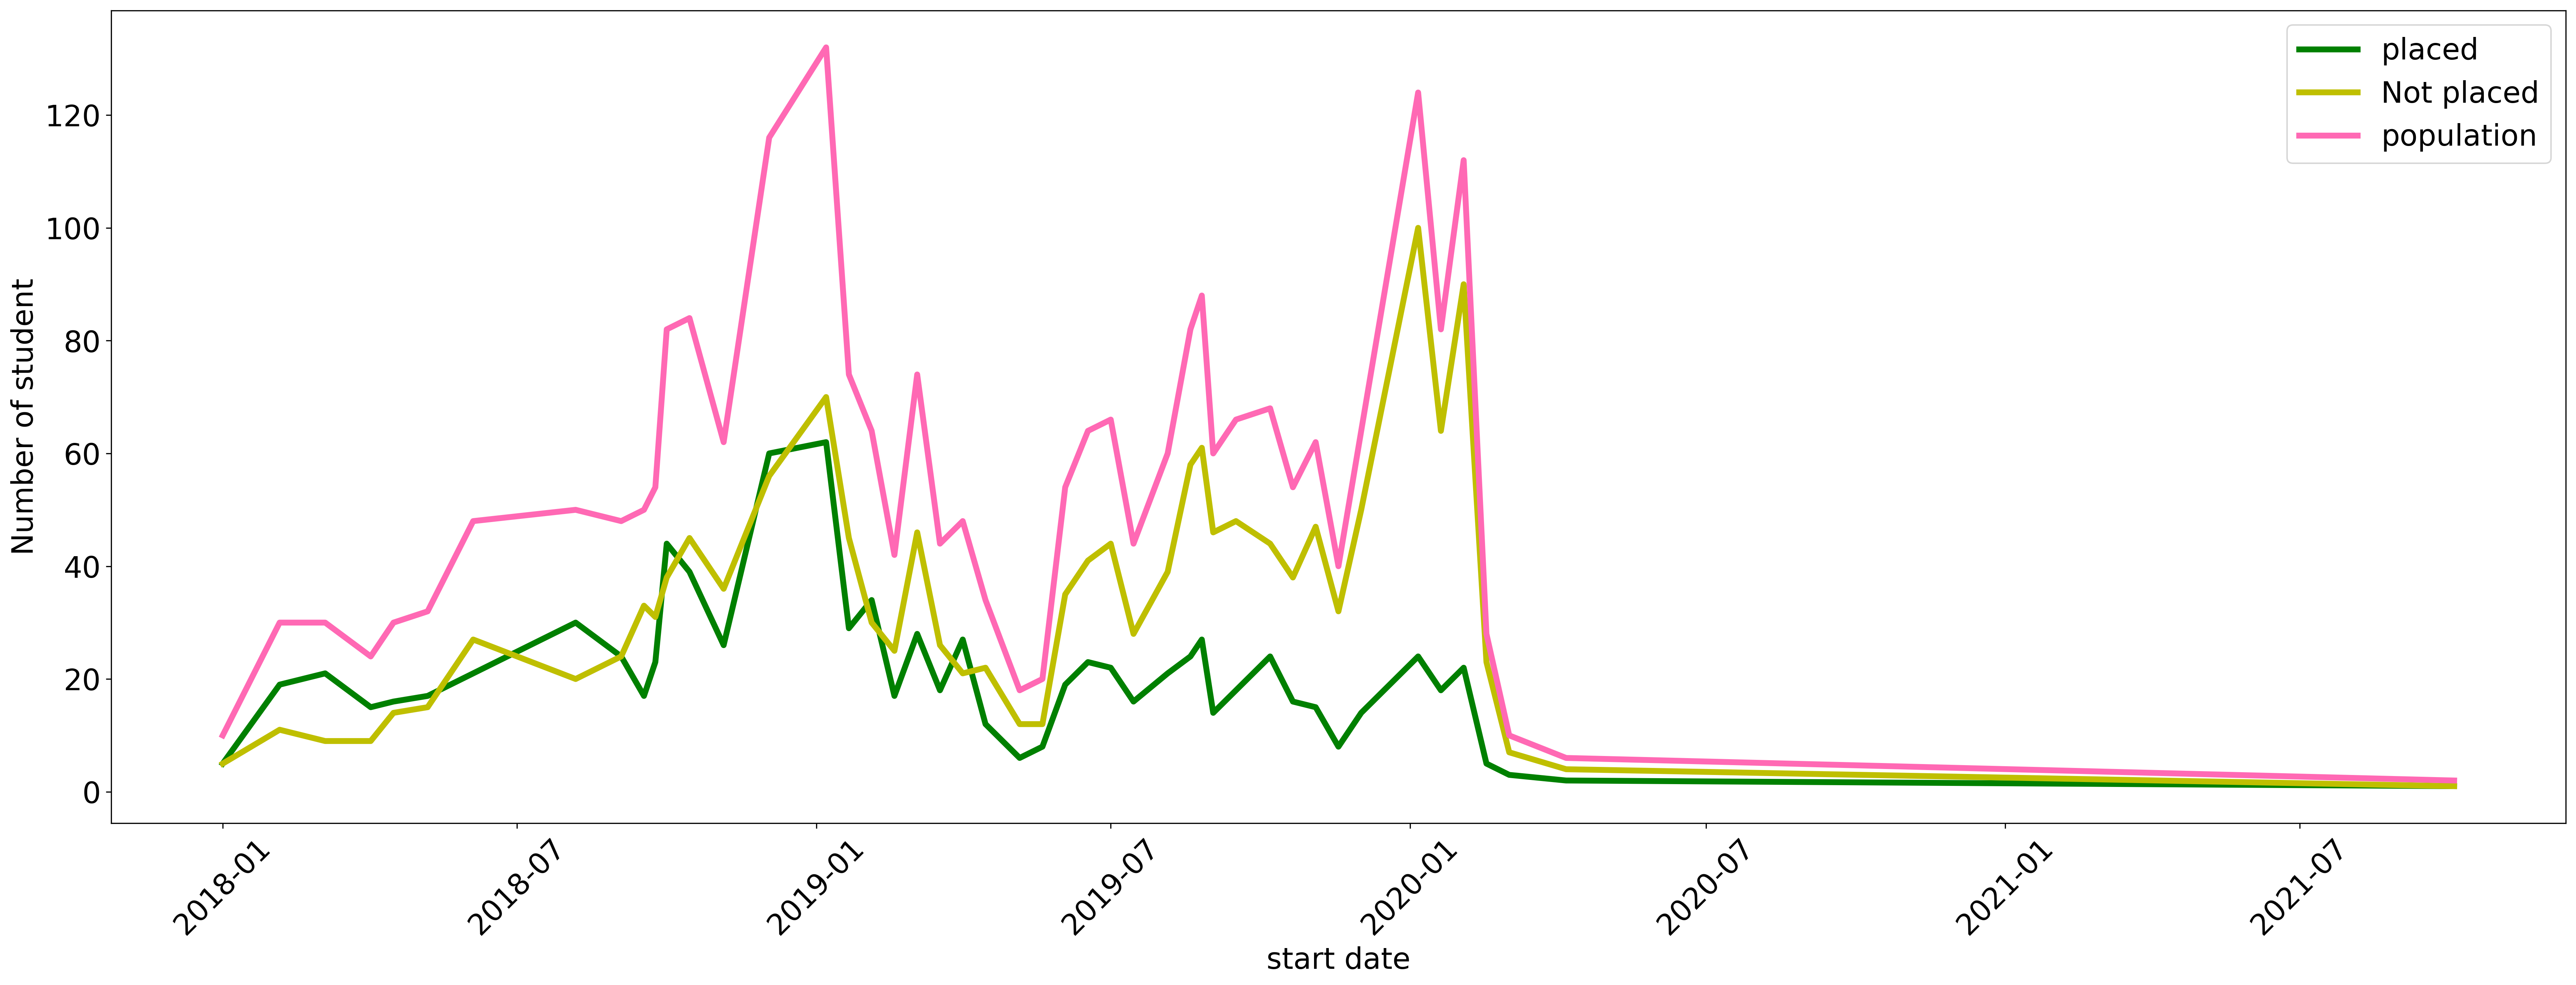

In [221]:
Table_time=pd.pivot_table(data=df1[['start_date','placed']],columns='placed',index='start_date',aggfunc='size')
Table_time.columns=['Not placed','placed']
Table_time['population']=Table_time.sum(axis=1)
plt.figure(figsize=(30,10),dpi=300)
font={'size':20}
plt.rc('font',**font)
plt.plot(Table_time.index.values,Table_time['placed'],'g',linewidth=4)
plt.plot(Table_time.index.values,Table_time['Not placed'],'y',linewidth=4)
plt.plot(Table_time.index.values,Table_time['population'],'hotpink',linewidth=4)
plt.legend(['placed','Not placed','population'])
plt.xlabel('start date')
plt.ylabel('Number of student')
plt.xticks(rotation=45)
fname=file_path+'Time_serise.png'
plt.savefig(fname=fname,dpi=300,bbox_inches='tight',transparent=True)
plt.rcdefaults()

In [222]:
education_dic={'No Degree':0,'Some High School':9,'GED or equivalent':10,'High School Graduate':12,'Some College, No Degree':14,"Bachelor's Degree":16,"Master's Degree":19,'Doctorate or Professional Degree':22}
job_search_dic={'Less than one month':0.5,'1-2 months':1.5,'3-5 months':4,'6 months to a year':9,'Over a year':12}
professional_dic={'Less than one year':1,'1-2 years':1.5,'3-4 years':3.5,'5+ years':5}
employment_dic={'Student':0,'Unemployed':1,'Contractor':2,'Employed Part-Time':3,'Employed Full-Time':4 }
col_dic={'employment_status':employment_dic,'highest_level_of_education':education_dic,'length_of_job_search':job_search_dic,'professional_experience':professional_dic}
recol_dic={'employment_status':'employment_rank','highest_level_of_education':'education_duration','length_of_job_search':'job_search_duration','professional_experience':'experience_duration'}

In [223]:
for col in col_dic:
    df1[recol_dic[col]]=df1[col].map(col_dic[col])

In [224]:
miss_col=['education_duration','job_search_duration','experience_duration','number_of_interviews']
for col in miss_col:
    df1[col].fillna(df1[col].mean(),inplace=True)

In [225]:
df1.select_dtypes(include='number').columns

Index(['id', 'program_duration_days', 'placed', 'number_of_interviews',
       'number_of_applications', 'duration', 'employment_rank',
       'education_duration', 'job_search_duration', 'experience_duration'],
      dtype='object')

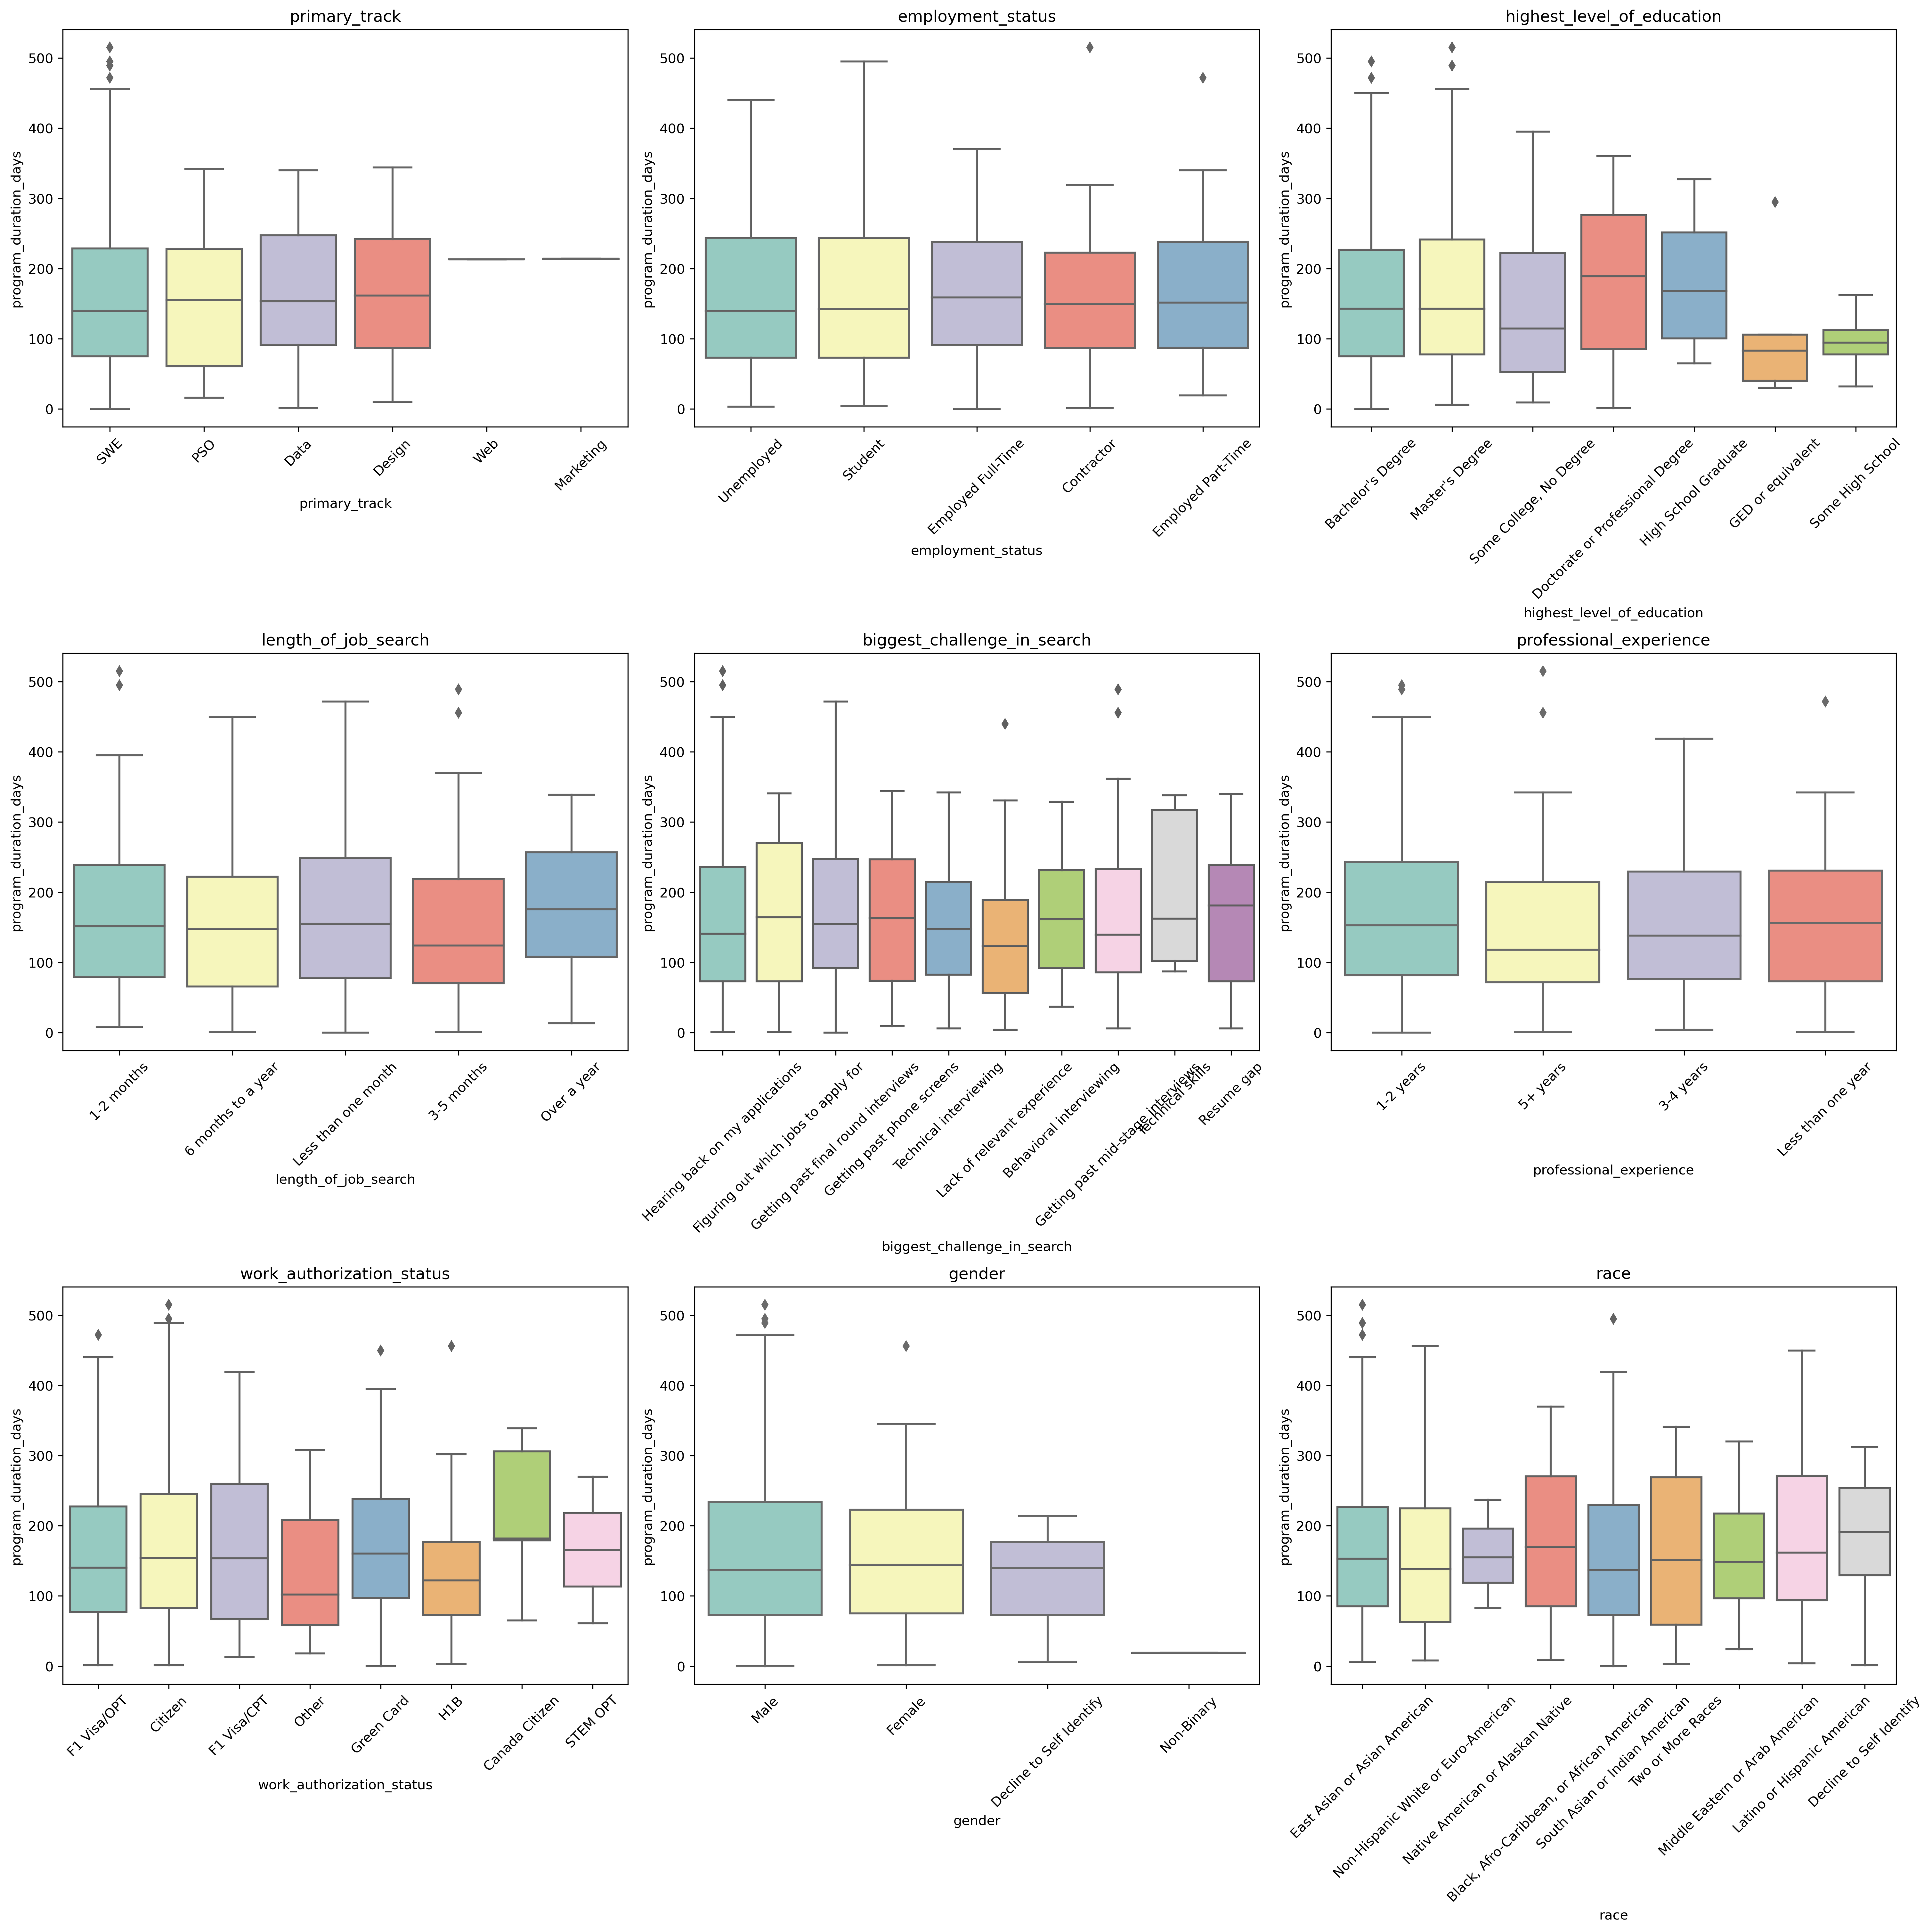

In [226]:
cols_name=['primary_track', 'employment_status',
       'highest_level_of_education', 'length_of_job_search',
       'biggest_challenge_in_search', 'professional_experience',
       'work_authorization_status', 'gender', 'race']#,'number_of_interviews','number_of_applications']
df_boxplot=df[df['placed']==1]
df_boxplot=df_boxplot.drop('placed',axis=1)

plt.figure(figsize=(20,20),dpi=300,layout='constrained')

for i,j in enumerate(cols_name):
    plt.subplot(3,3,i+1)
    sn.boxplot(data=df_boxplot,x=j,y='program_duration_days',palette='Set3')
    plt.title(j)
    plt.xticks(rotation=45)


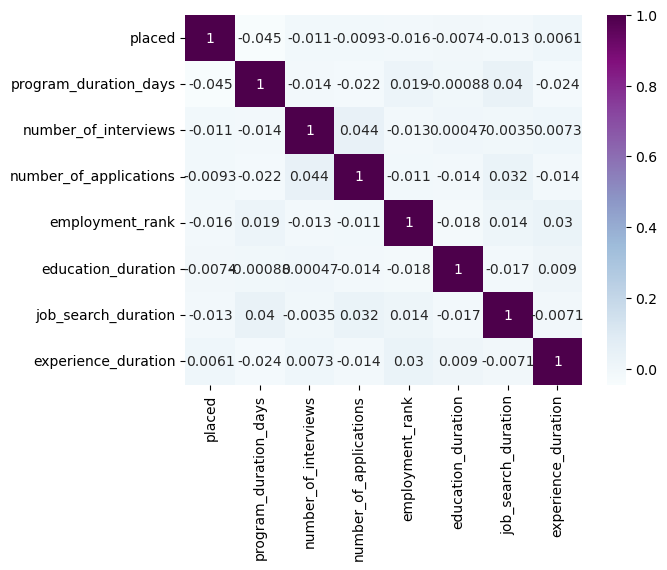

In [227]:
df_heatmap=df1[['placed','program_duration_days','number_of_interviews',
       'number_of_applications', 'employment_rank',
       'education_duration', 'job_search_duration', 'experience_duration']]
sn.heatmap(df_heatmap.corr(method='spearman'), cmap="BuPu", annot=True)
fname=file_path+'Heamap.png'
plt.savefig(fname=fname,dpi=300,bbox_inches='tight',transparent=True)
plt.show()

In [228]:
df1['biggest_challenge_in_search'].replace(np.nan,'No challenge',inplace=True)

In [229]:
dummies=['primary_track','biggest_challenge_in_search','work_authorization_status']
df_dummy=pd.get_dummies(df1[dummies])

In [230]:
df2=pd.concat([df1,df_dummy],axis=1)

In [231]:
Remove_cols=['id','pathrise_status','cohort_tag','employment_status'
             ,'highest_level_of_education','length_of_job_search','professional_experience'
             ,'gender','race','start_date','duration','primary_track','biggest_challenge_in_search','work_authorization_status']
df3=df2.copy()
df3.drop(columns=Remove_cols,inplace=True,axis=1)

In [232]:
for cols in df3.columns:
    if df3[cols].count()<len(df3.index):
       print("The column {} has {} missing values\n".format(cols,df3[cols].isnull().sum()))

In [233]:
df3.reset_index(drop=True,inplace=True)
x=df3.drop('placed',axis=1)
y=df3['placed']
x_cols=x.columns
transform=preprocessing.StandardScaler()
x_scale=transform.fit_transform(x)
x_final=pd.DataFrame(x_scale,columns=x_cols)
df_final=pd.concat([x_final,y],axis=1)

In [234]:
df_final.to_excel('Pathrise_MLC_dataset.xlsx')
df3.to_excel('Pathrise_final_dataset.xlsx')

In [235]:
def plot_confusion_matrix (y,y_predicted,model_name):
    cm=confusion_matrix(y,y_predicted)
    sn.heatmap(data=cm,annot=True,xticklabels=['Not placed','Placed'],yticklabels=['Not Placed','Placed'],cmap='crest')
    plt.xlabel('Predicted labels')
    plt.ylabel('Actual Lablels')
    plt.title('Confusion Matrix for {} model'.format(model_name))

In [236]:
x=df_final.drop('placed',axis=1)
y=df_final['placed']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [237]:
lr=LogisticRegression()
svc=SVC()
dt=tree.DecisionTreeClassifier()
knn=KNeighborsClassifier()


List_Model=[lr,svc,dt,knn]

lr_param={'C':[0.01,0.1,1],'solver':['lbfgs'],'penalty':['l2']}
svc_param={'C':[0.5,1,1.5],'kernel':['linear','rbf','poly','sigmoid']}
dt_param={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':[2*n for n in range(1,10)],'min_samples_split':[2,5,10],'min_samples_leaf':[1,2,4]}#'max_features':['auto'],'sqrt']}
knn_param={'n_neighbors':[1,2,3,4,5,6,7,8,9,10],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],'p':[1,2]}

param={lr:lr_param,svc:svc_param,dt:dt_param,knn:knn_param}

list_modle_name={lr:'Logistic Regression',svc:'Support Vector Machine',dt:'Decision Tree Classifier',knn:'K Nearest Neighbor' }
acc_success={}
acc_fail={}
best_param={}

In [238]:
df_param=pd.DataFrame(param)
df_param.to_excel(file_path+'Hyper_parameters.xlsx')

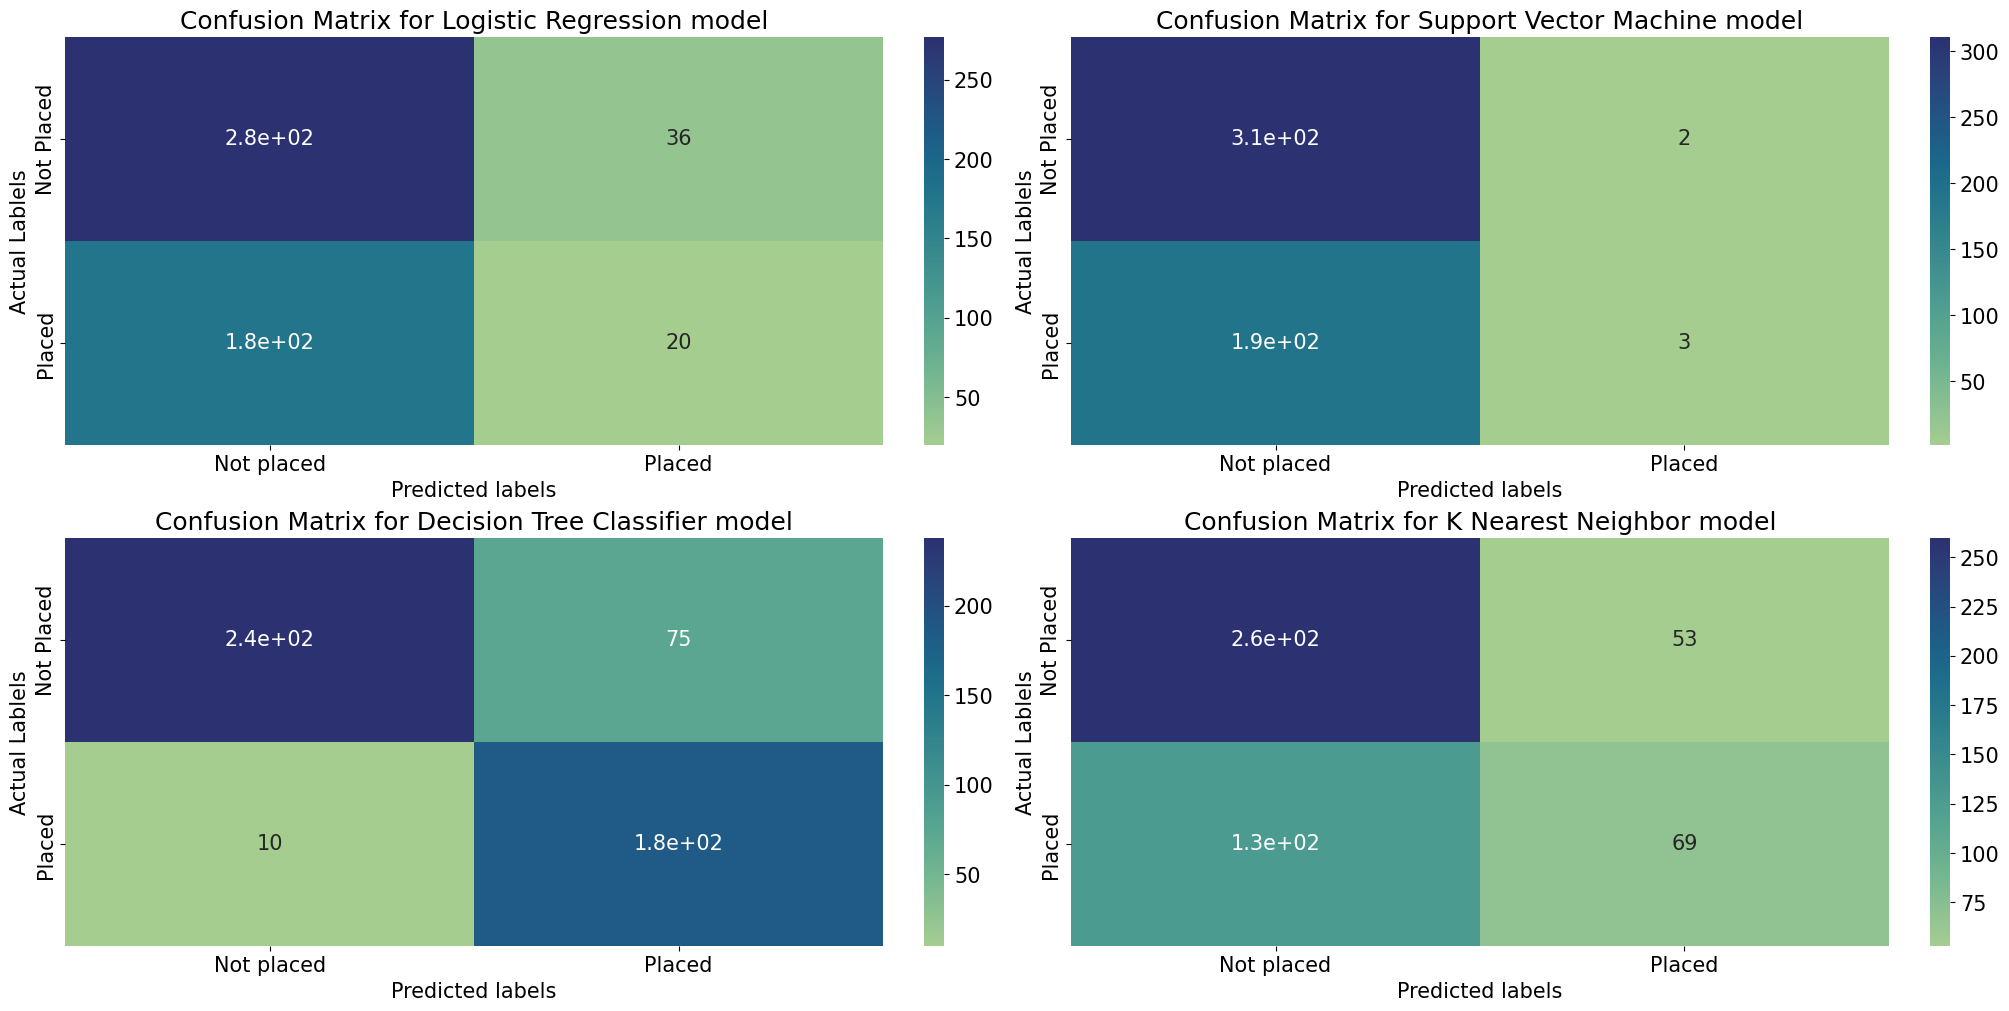

In [239]:
plt.figure(figsize=(20,10),dpi=100,layout='constrained')
font={'size':15}
for i,m in enumerate(List_Model):
    Model_cv=GridSearchCV(m,param[m],cv=4)
    Model_cv.fit(x_train,y_train)
    y_predict=Model_cv.predict(x_test)
    cr=classification_report(y_test,y_predict ,output_dict=True)
    cr['1'].update({'accuracy':cr['accuracy']})
    cr['0'].update({'accuracy':cr['accuracy']})
    acc_success[list_modle_name[m]]=cr['1']
    acc_fail[list_modle_name[m]]=cr['0']
    plt.rc('font',**font)
    plt.subplot(2,2,i+1)
    plot_confusion_matrix(y_test,y_predict,list_modle_name[m])
    best_param[list_modle_name[m]]=Model_cv.best_params_

plt.rcdefaults()

fname=file_path+'confusion_matrix.png'
plt.savefig(fname=fname,dpi=300,bbox_inches='tight',transparent=True)

In [240]:
df_acc_success=np.round(pd.DataFrame(acc_success),2)
df_acc_success=df_acc_success.drop('support',axis=0)
df_acc_success.to_excel(file_path+'acc_success.xlsx')
df_acc_success

Logistic Regression  Support Vector Machine  \
precision                 0.36                    0.60   
recall                    0.10                    0.02   
f1-score                  0.16                    0.03   
accuracy                  0.58                    0.62   

           Decision Tree Classifier  K Nearest Neighbor  
precision                      0.71                0.57  
recall                         0.95                0.35  
f1-score                       0.81                0.44  
accuracy                       0.83                0.65

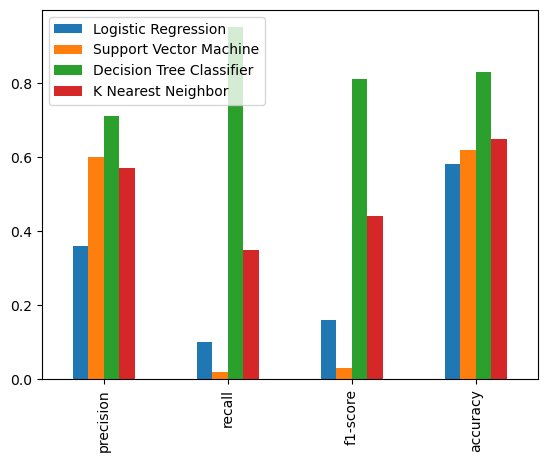

In [241]:
df_acc_success.plot.bar()
fname=file_path+'acc_success_barchart.png'
plt.savefig(fname=fname,dpi=300,bbox_inches='tight',transparent=True)

In [242]:
df_acc_fail=np.round(pd.DataFrame(acc_fail),2)
df_acc_fail=df_acc_fail.drop('support',axis=0)
df_acc_fail.to_excel(file_path+'acc_fail.xlsx')
df_acc_fail

Logistic Regression  Support Vector Machine  \
precision                 0.61                    0.62   
recall                    0.88                    0.99   
f1-score                  0.72                    0.76   
accuracy                  0.58                    0.62   

           Decision Tree Classifier  K Nearest Neighbor  
precision                      0.96                0.67  
recall                         0.76                0.83  
f1-score                       0.85                0.74  
accuracy                       0.83                0.65

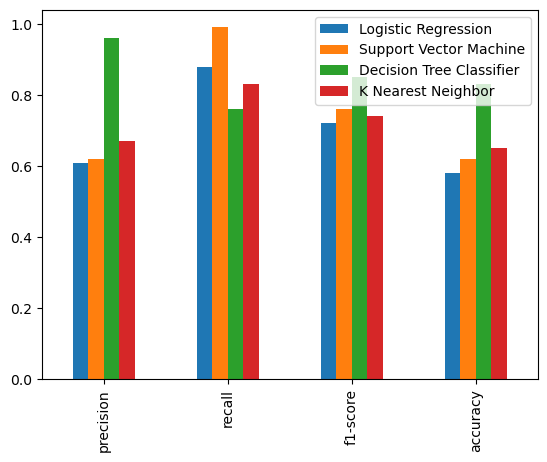

In [243]:
df_acc_fail.plot.bar()
fname=file_path+'acc_fail_barchart.png'
plt.savefig(fname=fname,dpi=300,bbox_inches='tight',transparent=True)

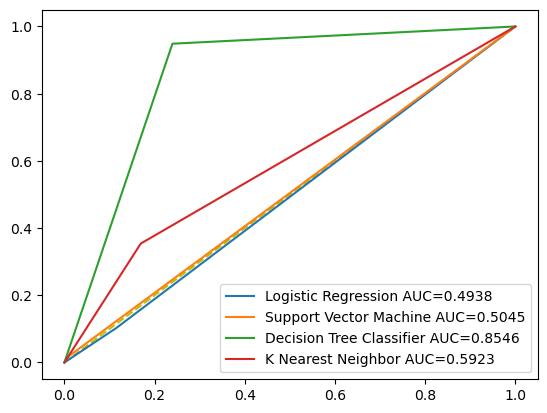

In [244]:
plt.plot([0,1],[0,1],'y--')
for m in List_Model:
    Model_cv=GridSearchCV(m,param[m],cv=4)
    Model_cv.fit(x_train,y_train)
    y_predict=Model_cv.predict(x_test)
    fpr, tpr, thresholds= roc_curve(y_test, y_predict)
    auc = round(roc_auc_score(y_test, y_predict), 4)
    plt.plot(fpr,tpr,label=list_modle_name[m]+' AUC='+str(auc))
    plt.legend()

fname=file_path+'ROC_curve.png'
plt.savefig(fname=fname,dpi=300,bbox_inches='tight',transparent=True)

In [245]:
df_best_param=pd.DataFrame(best_param)
df_best_param.to_excel(file_path+'Best_para.xlsx')
df_best_param

Logistic Regression Support Vector Machine  \
C                                0.01                    0.5   
penalty                            l2                    NaN   
solver                          lbfgs                    NaN   
kernel                            NaN                sigmoid   
criterion                         NaN                    NaN   
max_depth                         NaN                    NaN   
min_samples_leaf                  NaN                    NaN   
min_samples_split                 NaN                    NaN   
splitter                          NaN                    NaN   
algorithm                         NaN                    NaN   
n_neighbors                       NaN                    NaN   
p                                 NaN                    NaN   

                  Decision Tree Classifier K Nearest Neighbor  
C                                      NaN                NaN  
penalty                                NaN                NaN  
solver                                 NaN                NaN  
kernel                                 NaN                NaN  
criterion                             gini                NaN  
max_depth                                2                NaN  
min_samples_leaf                         1                NaN  
min_samples_split                        2                NaN  
splitter                              best                NaN  
algorithm                              NaN               auto  
n_neighbors                            NaN                 10  
p                                      NaN                  1

In [246]:
dt_cv=tree.DecisionTreeClassifier(criterion='gini',max_depth=2,min_samples_leaf=1,min_samples_split=2,splitter='best')
dt_cv.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

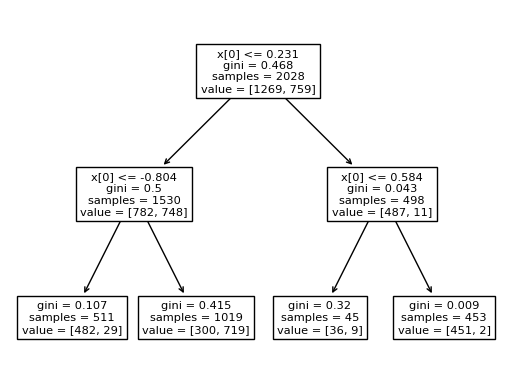

In [247]:
tree.plot_tree(dt_cv)
fname=file_path+'Decision_tree.png'
plt.savefig(fname=fname,dpi=300,bbox_inches='tight',transparent=True)
plt.show()

In [248]:
pickle.dump(dt_cv,open('Pathrise_CM','bw'))

In [249]:
df_reg=df3[df3['placed']==1]
df_reg=df_reg.drop('placed',axis=1)
df_reg.reset_index(drop=True,inplace=True)
x=df_reg.drop('program_duration_days',axis=1)
y=df_reg['program_duration_days']
x_cols=x.columns
x_scale=transform.fit_transform(x)
x_final=pd.DataFrame(x_scale,columns=x_cols)
df_final=pd.concat([x_final,y],axis=1)

In [250]:
df_final.to_excel('Pathrise_MLR_dataset.xlsx')

In [251]:
x=df_final.drop('program_duration_days',axis=1)
y=df_final['program_duration_days']

In [252]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [253]:
lreg=LinearRegression()
dtr=tree.DecisionTreeRegressor(max_depth=2)
svr=SVR(kernel='poly',degree=3,C=0.1)
model=[lreg,dtr,svr]
list_modle_name={lreg:'Linear Regression',svr:'Support Vector Regression',dtr:'Decision Tree Regression'}
metrics={}

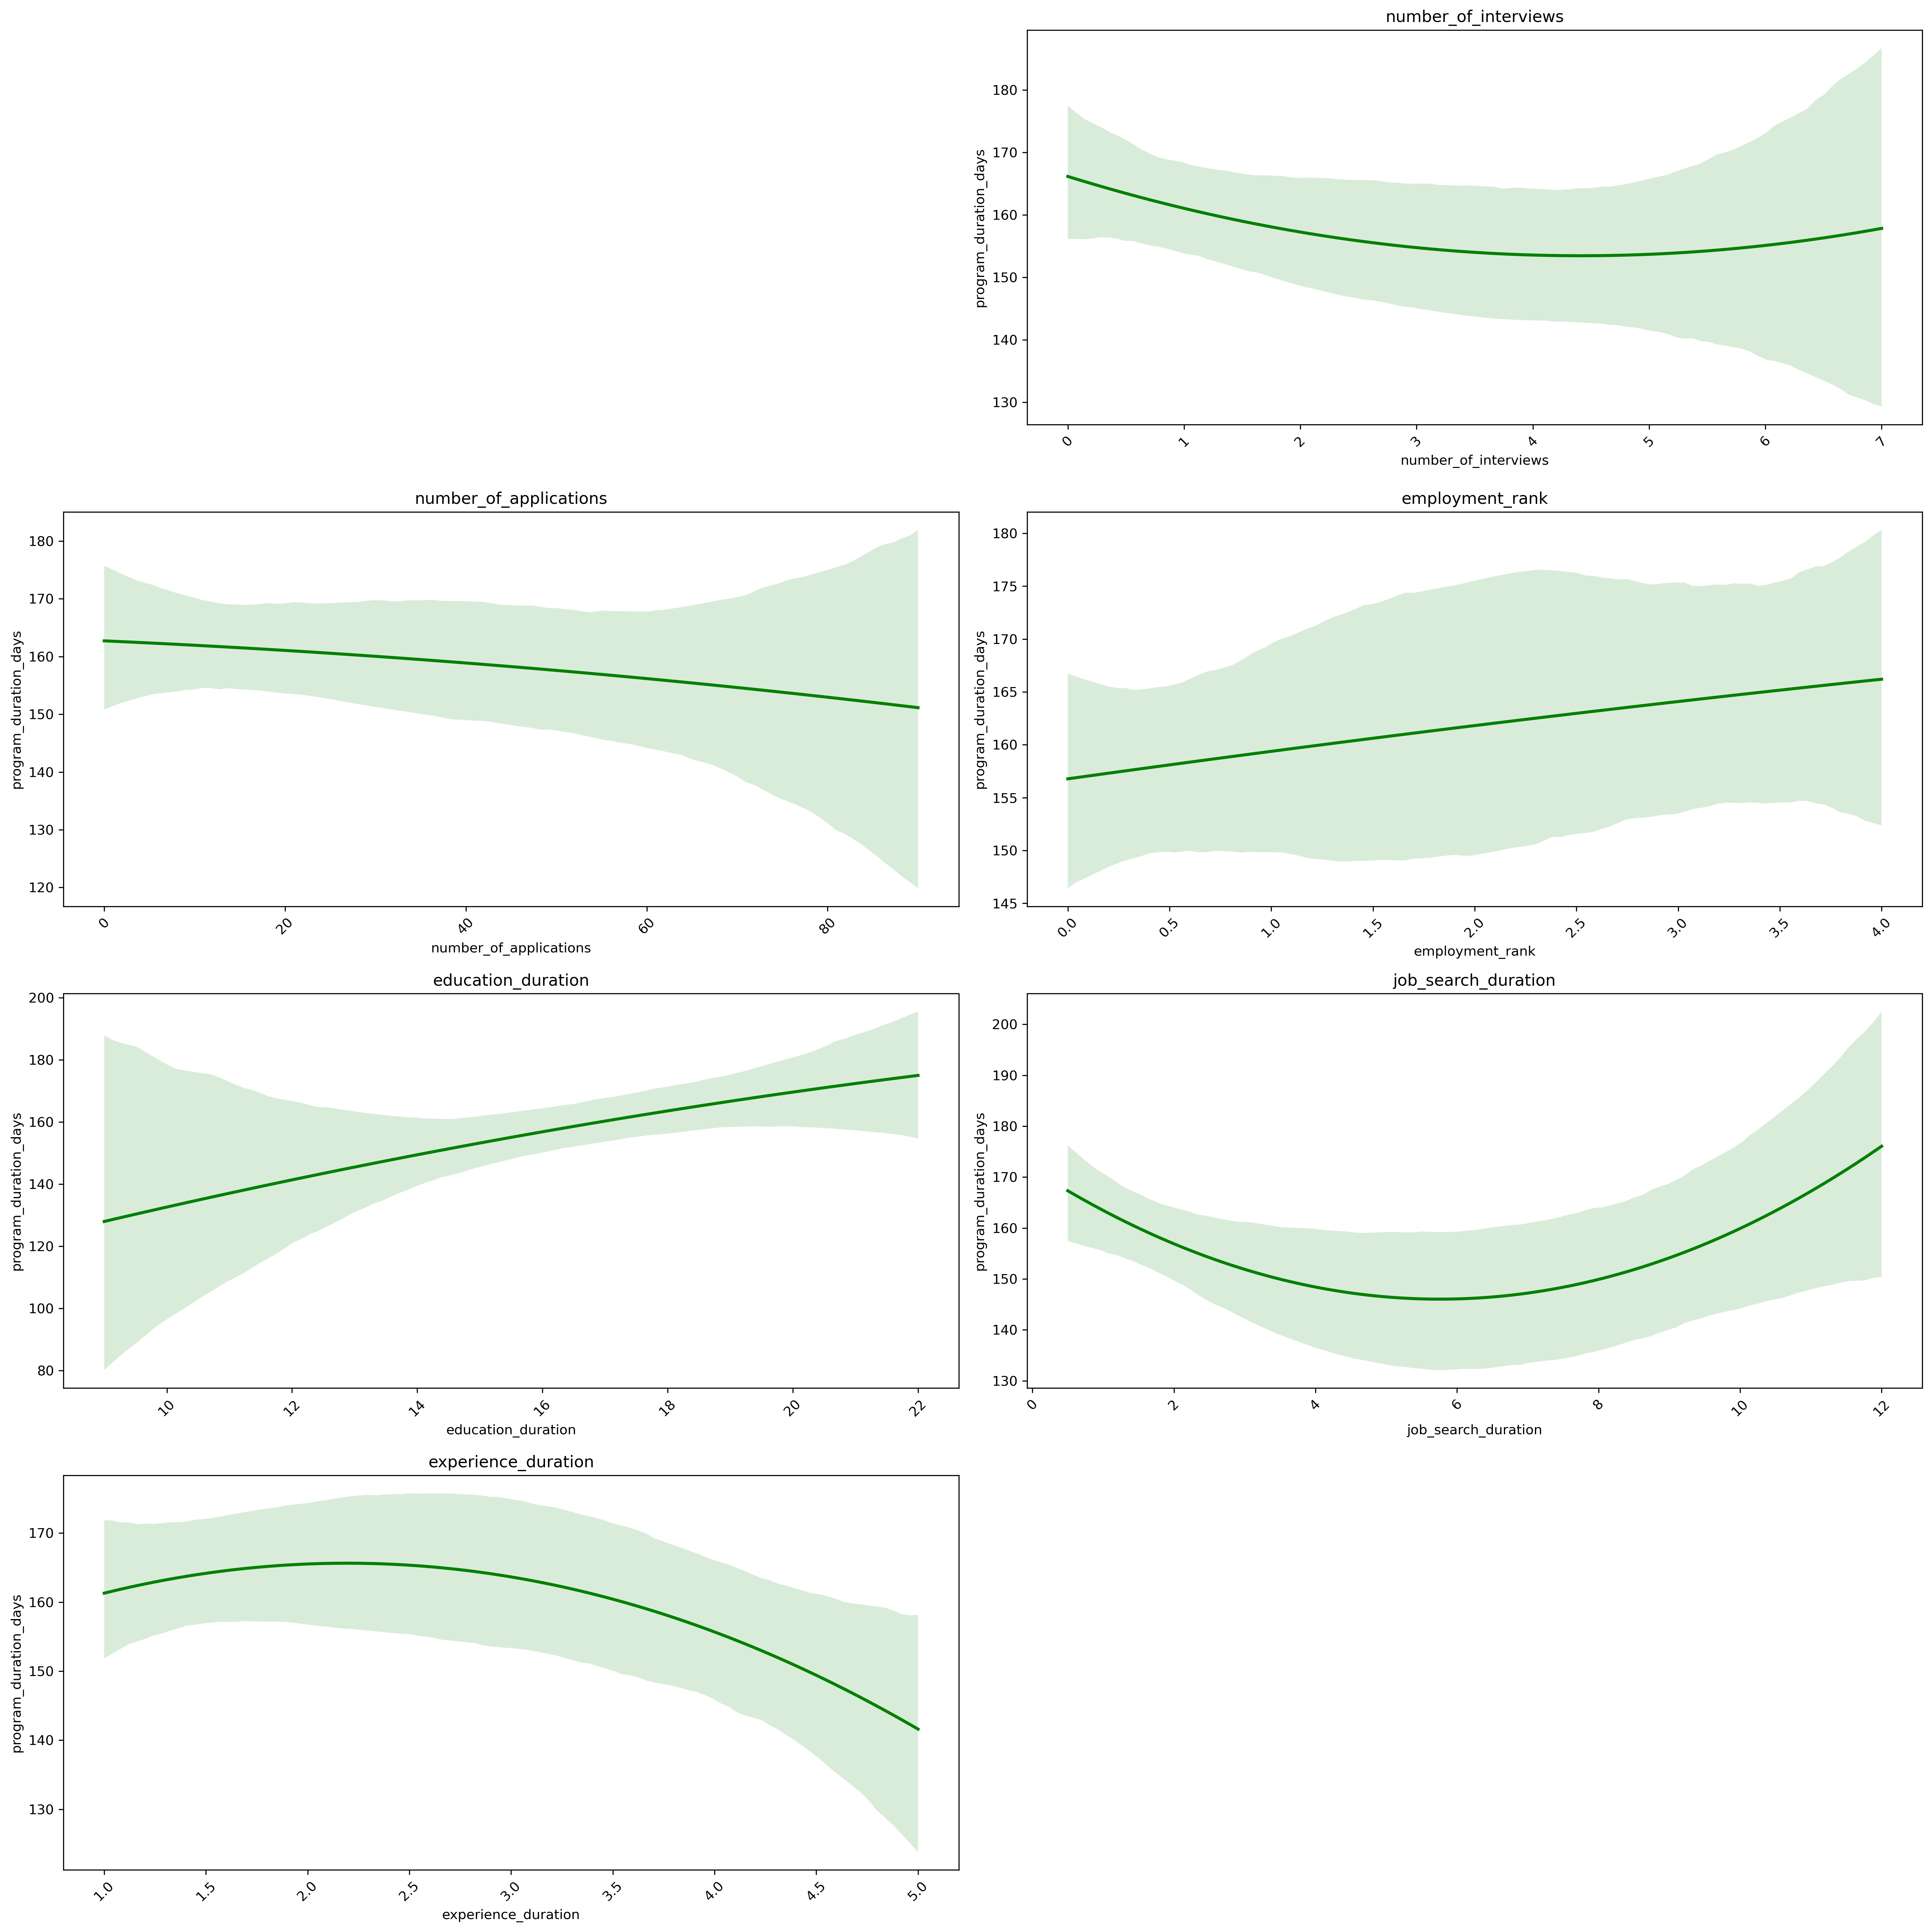

In [254]:
df_regplot=df3[['placed','program_duration_days','number_of_interviews',
       'number_of_applications', 'employment_rank',
       'education_duration', 'job_search_duration', 'experience_duration']]
df_regplot=df_regplot[df_regplot['placed']==1]
df_regplot=df_regplot.drop('placed',axis=1)
plt.figure(figsize=(20,20),dpi=300,layout='tight')
for i,j in enumerate(df_regplot.columns):
    if j!='program_duration_days':
        plt.subplot(4,2,i+1)
        sn.regplot(data=df_regplot,x=j,y='program_duration_days',scatter=False,color='green',order=2)
        plt.title(j)
        plt.xticks(rotation=45)

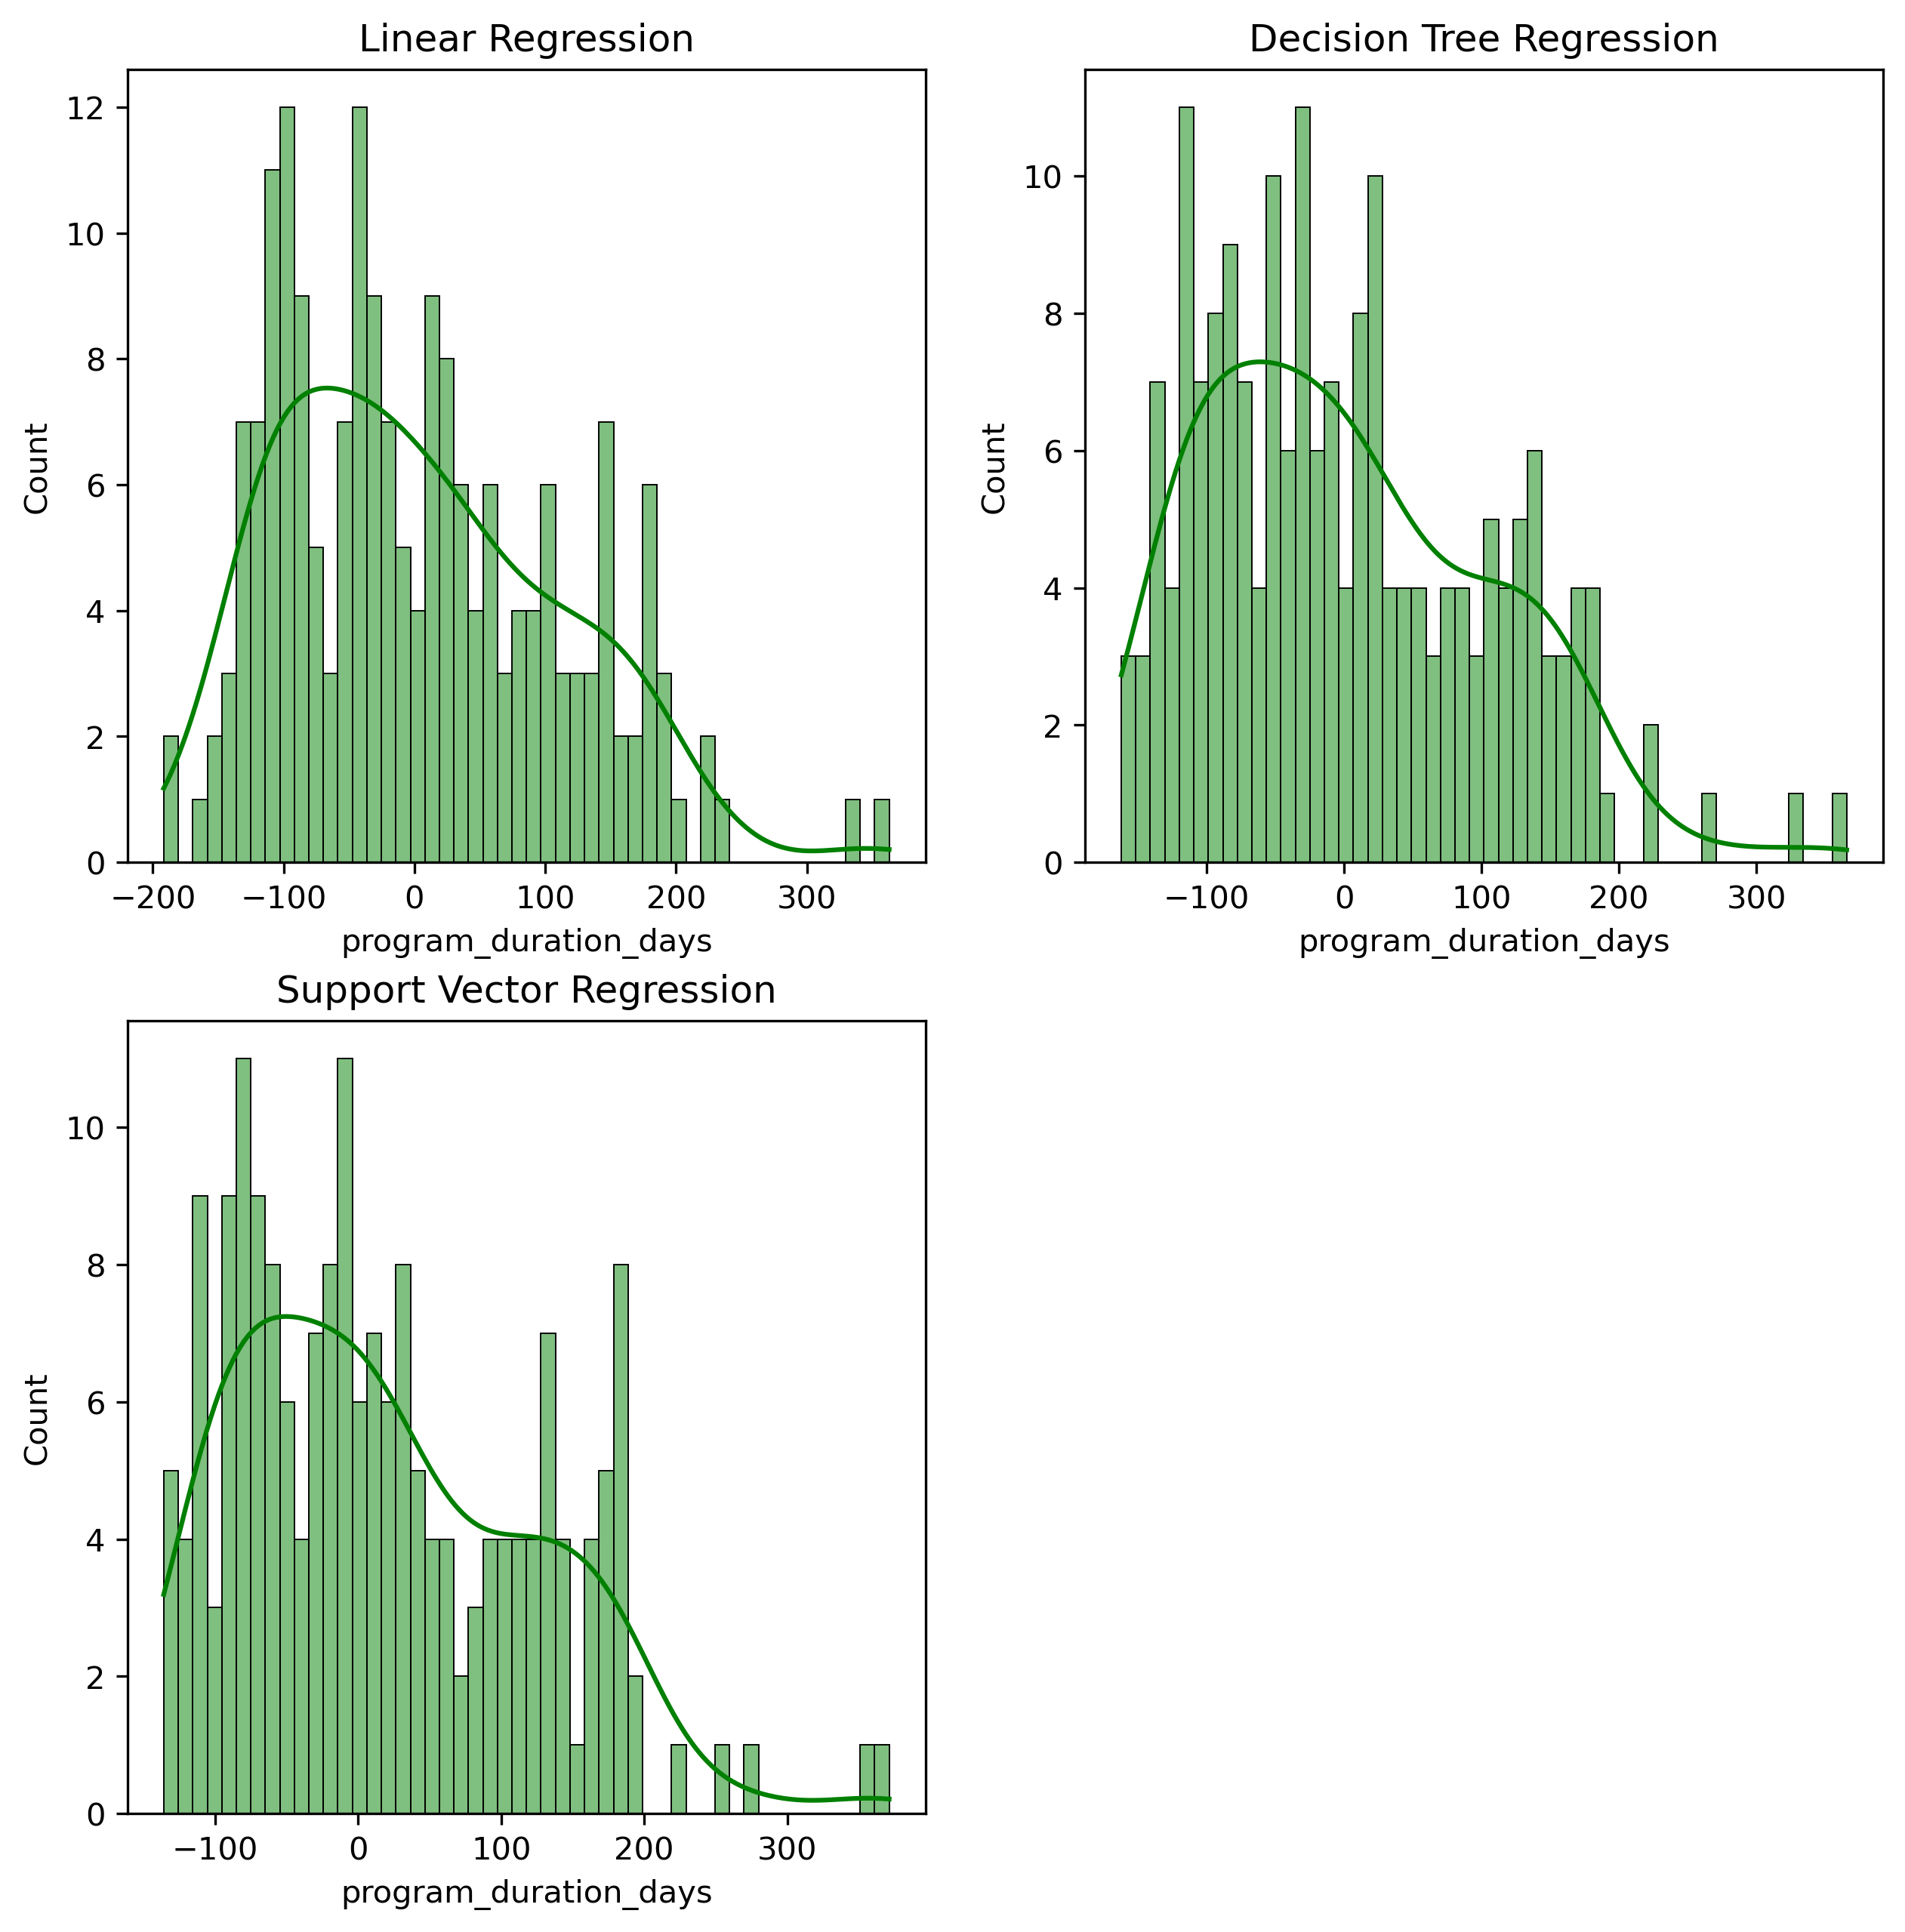

In [255]:
plt.figure(figsize=(10,10),dpi=300)
for i,ml in enumerate(model):
    ml.fit(x_train,y_train)
    y_p=ml.predict(x_test)
    metrics[list_modle_name[ml]]={'MAE':mean_absolute_error(y_test,y_p),'MSE':mean_squared_error(y_test,y_p),'RMSE':np.sqrt(mean_squared_error(y_test,y_p))}
    plt.subplot(2,2,i+1)
    residual=y_test-y_p
    sn.histplot(x=residual,bins=50,kde=True,color='green')
    plt.title(list_modle_name[ml])

In [256]:
font={'size':15}
for ml in model:
    ml.fit(x_train,y_train)
    y_p=ml.predict(x_test)
    residual=y_test-y_p
    plt.rc('font',**font)
    sn.histplot(x=residual,bins=50,kde=True,color='green')
    plt.title(list_modle_name[ml])
    fname=file_path+'{}_residual_histplot.png'.format(list_modle_name[ml])
    plt.savefig(fname=fname,dpi=300,bbox_inches='tight',transparent=True)
    plt.close()
plt.rcdefaults()

In [257]:
df_reg_err=np.round(pd.DataFrame(metrics),1)
df_reg_err.to_excel(file_path+'regression_error.xlsx')

In [258]:
pickle.dump(svr,open('Pathrise_RM','wb'))